<div style="display: flex; align-items: center; justify-content: center; gap: 20px;">
  <!-- Left Column: Image -->
  <div style="flex: 1; text-align: center;">
    <img src="https://i0.wp.com/cdcs.web.ua.pt/wp-content/uploads/2022/05/cropped-cropped-Picture13-1.png?w=968" width="370" height="200" style="display: block; margin: auto;"/>
  </div>

  <!-- Right Column: Text -->
  <div style="flex: 1; text-align: left;">
    <div><strong style="color: #4F5B63; font-size: 1.5em;">Master in Data Science for Social Sciences</strong></div>
    <div><strong style="color: #4F5B63; font-size: 1.2em;">University of Aveiro</strong></div>
    <p style="color: #46627F; font-weight: bold; font-style: italic;">Statistics and Optimization for Decision Support - 2025/2026</p>
    <p style="color: #4F5B63;"></p>
    <p style="color: #4F5B63;">Paulo Batista</p>
  </div>
</div>

<div style="display: flex; justify-content: space-around; align-items: flex-start;">
  <div style="width: 100%; padding: 10px; box-shadow: 0 2px 4px rgba(0,0,0,0.1); margin: 10px;">
    <h2><h1 style="text-align: center; font-size: 4em; color: #46627F; margin-top: 0; margin-bottom: 0; line-height: 1;">Block 3</h1>
    <p>
<h1 style="text-align: center; color: #B1C0CF; margin-top: 0; margin-bottom: 0; line-height: 1;"> - Introduction to Multivariate Analysis - Part 3 - </h1>
</p>

</h2>
      </div>
</div>

# EOAD 20252026 - Block III

Mestrado em Ciência dos Dados para Ciências Sociais <br>
Estatística e Optimização para Apoio à Decisão



In [ ]:
# Core stats libs
import scipy.stats as stats
from scipy.linalg import eigh  # for eigenvalues/eigenvectors
import statsmodels.api as sm
from statsmodels.multivariate.pca import PCA as SM_PCA
from statsmodels.multivariate.factor import Factor
# Optional but useful for FA diagnostics (install via: pip install factor_analyzer)
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

In [ ]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:

#clusters
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

#regression
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols


from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import pylab as py

import warnings

# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")


# IMPORT DATA

In [4]:
df=pd.read_csv('BGRI2011_PT_FREG.csv')
df

C:\Users\JLM\AppData\Local\Temp\ipykernel_30056\1615553598.py:1: DtypeWarning: Columns (135) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('BGRI2011_PT_FREG.csv')


ANO  GEO_COD            GEO_COD_DSG  NIVEL  NIVEL_DSG  \
0     2011    10101                 Agadão      6  Freguesia   
1     2011    10102        Aguada de Baixo      6  Freguesia   
2     2011    10103         Aguada de Cima      6  Freguesia   
3     2011    10104                 Águeda      6  Freguesia   
4     2011    10105                  Barrô      6  Freguesia   
...    ...      ...                    ...    ...        ...   
4255  2011   480201                Caveira      6  Freguesia   
4256  2011   480202                 Cedros      6  Freguesia   
4257  2011   480203          Ponta Delgada      6  Freguesia   
4258  2011   480204  Santa Cruz das Flores      6  Freguesia   
4259  2011   490101                  Corvo      6  Freguesia   

      N_EDIFICIOS_CLASSICOS  N_EDIFICIOS_CLASSICOS_1OU2  \
0                       204                         204   
1                       574                         559   
2                      1653                        1580   
3                      3485                        3141   
4                       784                         772   
...                     ...                         ...   
4255                     49                          49   
4256                     84                          84   
4257                    205                         204   
4258                    768                         751   
4259                    181                         177   

      N_EDIFICIOS_CLASSICOS_ISOLADOS  N_EDIFICIOS_CLASSICOS_GEMIN  \
0                                197                            7   
1                                497                           20   
2                               1346                          101   
3                               2251                          558   
4                                642                           28   
...                              ...                          ...   
4255                              49                            0   
4256                              84                            0   
4257                             173                           11   
4258                             641                          109   
4259                             112                           65   

      N_EDIFICIOS_CLASSICOS_EMBANDA  ...  NUTSII_COD  \
0                                 0  ...          16   
1                                42  ...          16   
2                               133  ...          16   
3                               332  ...          16   
4                               102  ...          16   
...                             ...  ...         ...   
4255                              0  ...          20   
4256                              0  ...          20   
4257                             20  ...          20   
4258                              1  ...          20   
4259                              0  ...          20   

                     NUTSIII_DSG  NUTSIII_COD  DISTRITO_ILHA_DSG  \
0               REGIÃO DE AVEIRO          16D             AVEIRO   
1               REGIÃO DE AVEIRO          16D             AVEIRO   
2               REGIÃO DE AVEIRO          16D             AVEIRO   
3               REGIÃO DE AVEIRO          16D             AVEIRO   
4               REGIÃO DE AVEIRO          16D             AVEIRO   
...                          ...          ...                ...   
4255  REGIÃO AUTÓNOMA DOS AÇORES          200    ILHA DAS FLORES   
4256  REGIÃO AUTÓNOMA DOS AÇORES          200    ILHA DAS FLORES   
4257  REGIÃO AUTÓNOMA DOS AÇORES          200    ILHA DAS FLORES   
4258  REGIÃO AUTÓNOMA DOS AÇORES          200    ILHA DAS FLORES   
4259  REGIÃO AUTÓNOMA DOS AÇORES          200      ILHA DO CORVO   

               CONCELHO_DSG  AREA_2019_ha  AREA_2019_km2  PERIM_km  \
0                    ÁGUEDA      33527.44         335.27       105   
1                    ÁGUEDA      33527.44         335.27       105   


In [5]:
#total de casos e colunas
df.shape

(4260, 143)

In [6]:
#designação das colunas
df.columns

Index(['ANO', 'GEO_COD', 'GEO_COD_DSG', 'NIVEL', 'NIVEL_DSG',
       'N_EDIFICIOS_CLASSICOS', 'N_EDIFICIOS_CLASSICOS_1OU2',
       'N_EDIFICIOS_CLASSICOS_ISOLADOS', 'N_EDIFICIOS_CLASSICOS_GEMIN',
       'N_EDIFICIOS_CLASSICOS_EMBANDA',
       ...
       'NUTSII_COD', 'NUTSIII_DSG', 'NUTSIII_COD', 'DISTRITO_ILHA_DSG',
       'CONCELHO_DSG', 'AREA_2019_ha', 'AREA_2019_km2', 'PERIM_km',
       'ALTITUDE_MAX_m', 'ALTITUDE_MIN_m'],
      dtype='object', length=143)

In [7]:
#visualiza as primeiras linhas da base de dados
df.head()

ANO  GEO_COD      GEO_COD_DSG  NIVEL  NIVEL_DSG  N_EDIFICIOS_CLASSICOS  \
0  2011    10101           Agadão      6  Freguesia                    204   
1  2011    10102  Aguada de Baixo      6  Freguesia                    574   
2  2011    10103   Aguada de Cima      6  Freguesia                   1653   
3  2011    10104           Águeda      6  Freguesia                   3485   
4  2011    10105            Barrô      6  Freguesia                    784   

   N_EDIFICIOS_CLASSICOS_1OU2  N_EDIFICIOS_CLASSICOS_ISOLADOS  \
0                         204                             197   
1                         559                             497   
2                        1580                            1346   
3                        3141                            2251   
4                         772                             642   

   N_EDIFICIOS_CLASSICOS_GEMIN  N_EDIFICIOS_CLASSICOS_EMBANDA  ...  \
0                            7                              0  ...   
1                           20                             42  ...   
2                          101                            133  ...   
3                          558                            332  ...   
4                           28                            102  ...   

   NUTSII_COD       NUTSIII_DSG  NUTSIII_COD  DISTRITO_ILHA_DSG  CONCELHO_DSG  \
0          16  REGIÃO DE AVEIRO          16D             AVEIRO        ÁGUEDA   
1          16  REGIÃO DE AVEIRO          16D             AVEIRO        ÁGUEDA   
2          16  REGIÃO DE AVEIRO          16D             AVEIRO        ÁGUEDA   
3          16  REGIÃO DE AVEIRO          16D             AVEIRO        ÁGUEDA   
4          16  REGIÃO DE AVEIRO          16D             AVEIRO        ÁGUEDA   

   AREA_2019_ha  AREA_2019_km2  PERIM_km  ALTITUDE_MAX_m  ALTITUDE_MIN_m  
0      33527.44         335.27       105             762               4  
1      33527.44         335.27       105             762               4  
2      33527.44         335.27       105             762               4  
3      33527.44         335.27       105             762               4  
4      33527.44         335.27       105             762               4  

[5 rows x 143 columns]

In [8]:
#estatísticas descritivas de todas as variáveis
df.describe()

ANO        GEO_COD   NIVEL  N_EDIFICIOS_CLASSICOS  \
count  4260.0    4260.000000  4260.0            4260.000000   
mean   2011.0  113087.680751     6.0             832.016197   
std       0.0   86697.460761     0.0            1036.379561   
min    2011.0   10101.000000     6.0              32.000000   
25%    2011.0   41011.750000     6.0             267.000000   
50%    2011.0  101510.500000     6.0             506.000000   
75%    2011.0  160304.250000     6.0             976.000000   
max    2011.0  490101.000000     6.0           12865.000000   

       N_EDIFICIOS_CLASSICOS_1OU2  N_EDIFICIOS_CLASSICOS_ISOLADOS  \
count                 4260.000000                     4260.000000   
mean                   755.819484                      456.949296   
std                    891.503187                      563.282782   
min                      0.000000                        0.000000   
25%                    255.000000                      138.000000   
50%                    482.000000                      287.000000   
75%                    908.000000                      567.000000   
max                  11762.000000                     9369.000000   

       N_EDIFICIOS_CLASSICOS_GEMIN  N_EDIFICIOS_CLASSICOS_EMBANDA  \
count                  4260.000000                    4260.000000   
mean                    127.322300                     171.547887   
std                     226.157497                     309.879833   
min                       0.000000                       0.000000   
25%                      16.000000                       8.000000   
50%                      56.000000                      57.000000   
75%                     140.000000                     201.000000   
max                    2753.000000                    3877.000000   

       N_EDIFICIOS_CLASSICOS_3OUMAIS  N_EDIFICIOS_CLASSICOS_OUTROS  ...  \
count                    4260.000000                   4260.000000  ...   
mean                       66.638263                      9.558451  ...   
std                       209.001074                     35.177784  ...   
min                         0.000000                      0.000000  ...   
25%                         0.000000                      0.000000  ...   
50%                         2.000000                      1.000000  ...   
75%                        22.000000                      4.000000  ...   
max                      2318.000000                    575.000000  ...   

       Unnamed: 127      MUNICOD         DICO    NUTSI_COD   NUTSII_COD  \
count           0.0  4260.000000  4260.000000  4260.000000  4260.000000   
mean            NaN  1130.746009  1130.746009     1.061972    14.157512   
std             NaN   866.997504   866.997504     0.288969     3.466585   
min             NaN   101.000000   101.000000     1.000000    11.000000   
25%             NaN   410.000000   410.000000     1.000000    11.000000   
50%             NaN  1015.000000  1015.000000     1.000000    16.000000   
75%             NaN  1603.000000  1603.000000     1.000000    16.000000   
max             NaN  4901.000000  4901.000000     3.000000    30.000000   

        AREA_2019_ha  AREA_2019_km2     PERIM_km  ALTITUDE_MAX_m  \
count    4260.000000    4260.000000  4260.000000     4260.000000   
mean    35300.594451     353.006019   109.374648      810.138028   
std     28577.148805     285.771753    48.053401      432.273560   
min       794.300000       7.940000    13.000000       17.000000   
25%     16110.410000     161.100000    75.000000      484.000000   
50%     25569.470000     255.690000    99.000000      823.000000   
75%     44759.640000     447.600000   135.500000     1103.000000   
max    172060.150000    1720.600000   300.000000     2351.000000   

       ALTITUDE_MIN_m  
count     4260.000000  
mean       102.864085  
std        126.918458  
min          0.000000  
25%          3.000000  
50%         50.000000  
75%        150.000000  
max        550.000000  

[8 rows x 135 co

# DATASET SELECTION 
Create a *subset* of the initial 

In [99]:
# Select Only Municipalities
df_BGRI_R = df[df["NUTSII_COD"]== 16]
df_BGRI_R

ANO  GEO_COD  NIVEL  N_EDIFICIOS_CLASSICOS  N_EDIFICIOS_CLASSICOS_1OU2  \
0     2011    10101      6                    204                         204   
1     2011    10102      6                    574                         559   
2     2011    10103      6                   1653                        1580   
3     2011    10104      6                   3485                        3141   
4     2011    10105      6                    784                         772   
...    ...      ...    ...                    ...                         ...   
4045  2011   182408      6                    336                         333   
4046  2011   182409      6                    877                         877   
4047  2011   182410      6                    600                         549   
4048  2011   182411      6                    567                         567   
4049  2011   182412      6                    525                         482   

      N_EDIFICIOS_CLASSICOS_ISOLADOS  N_EDIFICIOS_CLASSICOS_GEMIN  \
0                                197                            7   
1                                497                           20   
2                               1346                          101   
3                               2251                          558   
4                                642                           28   
...                              ...                          ...   
4045                             273                           59   
4046                             582                          105   
4047                             454                           16   
4048                             440                           66   
4049                             246                           43   

      N_EDIFICIOS_CLASSICOS_EMBANDA  N_EDIFICIOS_CLASSICOS_3OUMAIS  \
0                                 0                              0   
1                                42                             14   
2                               133                             68   
3                               332                            339   
4                               102                             11   
...                             ...                            ...   
4045                              1                              0   
4046                            190                              0   
4047                             79                              0   
4048                             61                              0   
4049                            193                             35   

      N_EDIFICIOS_CLASSICOS_OUTROS  ...  DICO   NUTSI_DSG  NUTSI_COD  \
0                                0  ...   101  CONTINENTE          1   
1                                1  ...   101  CONTINENTE          1   
2                                5  ...   101  CONTINENTE          1   
3                                5  ...   101  CONTINENTE          1   
4                                1  ...   101  CONTINENTE          1   
...                            ...  ...   ...         ...        ...   
4045                             3  ...  1824  CONTINENTE          1   
4046                             0  ...  1824  CONTINENTE          1   
4047                            51  ...  1824  CONTINENTE          1   
4048                             0  ...  1824  CONTINENTE          1   
4049                             8  ...  1824  CONTINENTE          1   

      NUTSII_COD  CONCELHO_DSG  AREA_2019_ha  AREA_2019_km2  PERIM_km  \
0             16        ÁGUEDA      33527.44         335.27       105   
1             16        ÁGUEDA      33527.44         335.27       105   
2             16        ÁGUEDA      33527.44         335.27       105   
3             16        ÁGUEDA      33527.44         335.27       105   
4             16        ÁGUEDA      33527.44         335.27       105   
...          ...           ...           ...            ...  

In [86]:
column_names = df.columns.tolist()
print(column_names)


['ANO', 'GEO_COD', 'NIVEL', 'N_EDIFICIOS_CLASSICOS', 'N_EDIFICIOS_CLASSICOS_1OU2', 'N_EDIFICIOS_CLASSICOS_ISOLADOS', 'N_EDIFICIOS_CLASSICOS_GEMIN', 'N_EDIFICIOS_CLASSICOS_EMBANDA', 'N_EDIFICIOS_CLASSICOS_3OUMAIS', 'N_EDIFICIOS_CLASSICOS_OUTROS', 'N_EDIFICIOS_EXCLUSIV_RESID', 'N_EDIFICIOS_PRINCIPAL_RESID', 'N_EDIFICIOS_PRINCIP_NAO_RESID', 'N_EDIFICIOS_1OU2_PISOS', 'N_EDIFICIOS_3OU4_PISOS', 'N_EDIFICIOS_5OU_MAIS_PISOS', 'N_EDIFICIOS_CONSTR_ANTES_1919', 'N_EDIFICIOS_CONSTR_1919A1945', 'N_EDIFICIOS_CONSTR_1946A1960', 'N_EDIFICIOS_CONSTR_1961A1970', 'N_EDIFICIOS_CONSTR_1971A1980', 'N_EDIFICIOS_CONSTR_1981A1990', 'N_EDIFICIOS_CONSTR_1991A1995', 'N_EDIFICIOS_CONSTR_1996A2000', 'N_EDIFICIOS_CONSTR_2001A2005', 'N_EDIFICIOS_CONSTR_2006A2011', 'N_EDIFICIOS_ESTRUT_BETAO', 'N_EDIFICIOS_ESTRUT_COM_PLACA', 'N_EDIFICIOS_ESTRUT_SEM_PLACA', 'N_EDIFICIOS_ESTRUT_ADOBE_PEDRA', 'N_EDIFICIOS_ESTRUT_OUTRA', 'N_ALOJAMENTOS', 'N_ALOJAMENTOS_FAMILIARES', 'N_ALOJAMENTOS_FAM_CLASSICOS', 'N_ALOJAMENTOS_FAM_N_CLASSI

In [11]:
Municipios=df['CONCELHO_DSG'].unique()
Municipios

array(['ÁGUEDA', 'ALBERGARIA-A-VELHA', 'ANADIA', 'AROUCA', 'AVEIRO',
       'CASTELO DE PAIVA', 'ESPINHO', 'ESTARREJA', 'SANTA MARIA DA FEIRA',
       'ÍLHAVO', 'MEALHADA', 'MURTOSA', 'OLIVEIRA DE AZEMÉIS',
       'OLIVEIRA DO BAIRRO', 'OVAR', 'SÃO JOÃO DA MADEIRA',
       'SEVER DO VOUGA', 'VAGOS', 'VALE DE CAMBRA', 'ALJUSTREL',
       'ALMODÔVAR', 'ALVITO', 'BARRANCOS', 'BEJA', 'CASTRO VERDE', 'CUBA',
       'FERREIRA DO ALENTEJO', 'MÉRTOLA', 'MOURA', 'ODEMIRA', 'OURIQUE',
       'SERPA', 'VIDIGUEIRA', 'AMARES', 'BARCELOS', 'BRAGA',
       'CABECEIRAS DE BASTO', 'CELORICO DE BASTO', 'ESPOSENDE', 'FAFE',
       'GUIMARÃES', 'PÓVOA DE LANHOSO', 'TERRAS DE BOURO',
       'VIEIRA DO MINHO', 'VILA NOVA DE FAMALICÃO', 'VILA VERDE',
       'VIZELA', 'ALFÂNDEGA DA FÉ', 'BRAGANÇA', 'CARRAZEDA DE ANSIÃES',
       'FREIXO DE ESPADA À CINTA', 'MACEDO DE CAVALEIROS',
       'MIRANDA DO DOURO', 'MIRANDELA', 'MOGADOURO', 'TORRE DE MONCORVO',
       'VILA FLOR', 'VIMIOSO', 'VINHAIS', 'BELMONTE', 'CA

In [12]:
df.drop(['GEO_COD_DSG','NIVEL_DSG','NUTSII_DSG', 'NUTSIII_DSG', 'NUTSIII_COD', 'DISTRITO_ILHA_DSG'], axis=1, inplace=True)

In [13]:
#Performs data aggregation on a DataFrame df_numeric by summing up numerical values grouped by the CONCELHO_DSG column.
#Initially, it drops columns that shouldn't be summed, like 'ANO', 'GEO_COD', etc., and stores the modified DataFrame in df_temp. 
#It then groups df_temp by 'CONCELHO_DSG' and sums the remaining columns. After that, 
#it merges back the excluded columns from the original DataFrame df to the aggregated DataFrame df_BGRI. 
#Finally, it optionally resets the DataFrame index for a cleaner output.

# Drop the columns that you don't want to sum
columns_to_exclude = ['ANO', 'GEO_COD', 'NIVEL', 'MUNICOD', 'DICO', 'NUTSI_COD', 'NUTSII_COD']
df_temp = df.drop(columns=columns_to_exclude)

# Perform the groupby and sum operation
df_BGRI = df_temp.groupby('CONCELHO_DSG').sum().reset_index()

# Merge back the columns that were excluded
first_row_per_group = df[df['CONCELHO_DSG'].isin(df_BGRI['CONCELHO_DSG'])].drop_duplicates(subset=['CONCELHO_DSG'])
columns_to_merge_back = ['CONCELHO_DSG'] + columns_to_exclude
df_BGRI = pd.merge(df_BGRI, first_row_per_group[columns_to_merge_back], on='CONCELHO_DSG', how='left')

# Optionally, reset the index
df_BGRI.reset_index(inplace=True, drop=True)

df_BGRI


CONCELHO_DSG  N_EDIFICIOS_CLASSICOS  N_EDIFICIOS_CLASSICOS_1OU2  \
0              ABRANTES                  20368                       19608   
1       AGUIAR DA BEIRA                   4704                        4641   
2             ALANDROAL                   4377                        4343   
3    ALBERGARIA-A-VELHA                  10140                        9461   
4             ALBUFEIRA                  19686                       16603   
..                  ...                    ...                         ...   
302             VOUZELA                   6457                        6351   
303              ÁGUEDA                  18572                       17839   
304               ÉVORA                  20676                       18953   
305              ÍLHAVO                  15036                       13817   
306              ÓBIDOS                   8286                        8021   

     N_EDIFICIOS_CLASSICOS_ISOLADOS  N_EDIFICIOS_CLASSICOS_GEMIN  \
0                             10321                         4161   
1                              3339                          285   
2                              1780                         1331   
3                              7632                          909   
4                              8157                         2575   
..                              ...                          ...   
302                            5269                          452   
303                           13481                         2274   
304                            4280                         4096   
305                            8062                         3880   
306                            4793                         1550   

     N_EDIFICIOS_CLASSICOS_EMBANDA  N_EDIFICIOS_CLASSICOS_3OUMAIS  \
0                             5126                            711   
1                             1017                             28   
2                             1232                             25   
3                              920                            326   
4                             5871                           2393   
..                             ...                            ...   
302                            630                             40   
303                           2084                            704   
304                          10577                           1408   
305                           1875                           1158   
306                           1678                            130   

     N_EDIFICIOS_CLASSICOS_OUTROS  N_EDIFICIOS_EXCLUSIV_RESID  \
0                              49                       19392   
1                              35                        4525   
2                               9                        4281   
3                             353                        9501   
4                             690                       18651   
..                            ...                         ...   
302                            66                        6096   
303                            29                       17511   
304                           315                       19801   
305                            61                       14273   
306                           135                        8040   

     N_EDIFICIOS_PRINCIPAL_RESID  ...  PERIM_km  ALTITUDE_MAX_m  \
0                            846  ...      3477            6023   
1                            157  ...       871           12857   
2                             61  ...      1002            2496   
3                            560  ...       656            3400   
4                            781  ...       410            1135   
..                           ...  ...       ...             ...   
302                          333  ...       912           12516   
303                          895  ...      2100           15240   
304                          656  ...      5

# INDICATORS FROM THE INITIAL DATASET
From the original BGRI database, some composite indicators are constructed for statistical treatment

In [14]:
#criação de uma lista de indicadores compósitos 
indicators_list = ['IVolumetria', 
                   'vagos_perc', 
                   'IMédia_edif',
                   'aloj_habitual_perc', 
                   'dimensao_aloj', 
                   'aloj_por_familia', 
                   'arrendamento_perc', 
                   'divisões_n', 
                   'ind_envelhecimento', 
                   'ind_migração', 
                   'primário_perc', 
                   'terciário_perc']


In [15]:
#Índice de volumetria do edificado (número de médio de pisos por unidade territorial)
total_edificios = (df_BGRI.N_EDIFICIOS_1OU2_PISOS)+(df_BGRI.N_EDIFICIOS_3OU4_PISOS)+(df_BGRI.N_EDIFICIOS_5OU_MAIS_PISOS)
volumetria = ((df_BGRI.N_EDIFICIOS_1OU2_PISOS*1.5)+(df_BGRI.N_EDIFICIOS_3OU4_PISOS*3.5)+(df_BGRI.N_EDIFICIOS_5OU_MAIS_PISOS*7))
df_BGRI["IVolumetria"] = volumetria/total_edificios
df_BGRI["IVolumetria"]

0      1.690642
1      1.765200
2      1.505483
3      1.709911
4      1.935741
         ...   
302    1.706365
303    1.727331
304    1.647006
305    1.732342
306    1.603669
Name: IVolumetria, Length: 307, dtype: float64

In [16]:
#alojamentos vagos (valor percentual de alojamentos vagos por unidade territorial)
df_BGRI["vagos_perc"]=df_BGRI['N_ALOJAMENTOS_VAGOS']/df_BGRI['N_ALOJAMENTOS']
df_BGRI["vagos_perc"]

0      0.171649
1      0.165985
2      0.111849
3      0.141594
4      0.123953
         ...   
302    0.142644
303    0.125995
304    0.123435
305    0.107229
306    0.132491
Name: vagos_perc, Length: 307, dtype: float64

In [17]:
#média de anos do edificado (idade média do edificado por unidade territorial)
total_edificios = (df_BGRI.N_EDIFICIOS_CONSTR_ANTES_1919)+(df_BGRI.N_EDIFICIOS_CONSTR_1919A1945)+(df_BGRI.N_EDIFICIOS_CONSTR_1946A1960)+(df_BGRI.N_EDIFICIOS_CONSTR_1961A1970)+(df_BGRI.N_EDIFICIOS_CONSTR_1971A1980)+(df_BGRI.N_EDIFICIOS_CONSTR_1981A1990)+(df_BGRI.N_EDIFICIOS_CONSTR_1991A1995)+(df_BGRI.N_EDIFICIOS_CONSTR_1996A2000)+(df_BGRI.N_EDIFICIOS_CONSTR_2001A2005)+(df_BGRI.N_EDIFICIOS_CONSTR_2006A2011)
df_BGRI['IMédia_edif'] = (((2011-1910)*df_BGRI.N_EDIFICIOS_CONSTR_ANTES_1919)+((2011-1932)*df_BGRI.N_EDIFICIOS_CONSTR_1919A1945)+((2011-1953)*df_BGRI.N_EDIFICIOS_CONSTR_1946A1960)+((2011-1965.5)*df_BGRI.N_EDIFICIOS_CONSTR_1961A1970)+((2011-1975.5)*df_BGRI.N_EDIFICIOS_CONSTR_1971A1980)+((2011-1985.5)*df_BGRI.N_EDIFICIOS_CONSTR_1981A1990)+((2011-1993)*df_BGRI.N_EDIFICIOS_CONSTR_1991A1995)+((2011-1998)*df_BGRI.N_EDIFICIOS_CONSTR_1996A2000)+((2011-2003)*df_BGRI.N_EDIFICIOS_CONSTR_2001A2005)+((2011-2008.5)*df_BGRI.N_EDIFICIOS_CONSTR_2006A2011))/total_edificios
df_BGRI['IMédia_edif']

0      45.844781
1      36.630527
2      45.180946
3      38.206607
4      26.366860
         ...    
302    39.883460
303    36.098455
304    41.902955
305    34.179669
306    30.288921
Name: IMédia_edif, Length: 307, dtype: float64

In [18]:
#alojamento de residencia habitual (principal) (percentagem de alojamentos de residência habitual por unidade territorial)
df_BGRI["aloj_habitual_perc"]= df_BGRI["N_ALOJAMENTOS_RES_HABITUAL"]/df_BGRI["N_ALOJAMENTOS"]
df_BGRI["aloj_habitual_perc"]

0      0.622193
1      0.430703
2      0.526910
3      0.740167
4      0.368015
         ...   
302    0.574002
303    0.759953
304    0.766163
305    0.655794
306    0.499834
Name: aloj_habitual_perc, Length: 307, dtype: float64

In [19]:
#dimensão média dos alojamentos (dimensão média dos alojamentos em metros quadrados por unidade territorial)
total_edificios = (df_BGRI.N_RES_HABITUAL_AREA_50)+(df_BGRI.N_RES_HABITUAL_AREA_50_100)+(df_BGRI.N_RES_HABITUAL_AREA_100_200)+(df_BGRI.N_RES_HABITUAL_AREA_200)
dimensao = ((df_BGRI.N_RES_HABITUAL_AREA_50*25)+(df_BGRI.N_RES_HABITUAL_AREA_50_100*75)+(df_BGRI.N_RES_HABITUAL_AREA_100_200*150)+(df_BGRI.N_RES_HABITUAL_AREA_200*300))
df_BGRI["dimensao_aloj"]=dimensao/total_edificios
df_BGRI["dimensao_aloj"]

0      116.877126
1      126.414646
2      119.028595
3      136.912475
4      111.945182
          ...    
302    125.455611
303    144.409544
304    113.679540
305    136.934586
306    131.781354
Name: dimensao_aloj, Length: 307, dtype: float64

In [20]:
#alojamento por família (número de alojamento por agregado familiar por unidade territorial)
df_BGRI["aloj_por_familia"]= df_BGRI["N_ALOJAMENTOS"]/df_BGRI["N_FAMILIAS_CLASSICAS"]
df_BGRI["aloj_por_familia"]

0      1.597774
1      2.317385
2      1.896262
3      1.334379
4      2.631060
         ...   
302    1.730036
303    1.309689
304    1.287038
305    1.505857
306    1.964099
Name: aloj_por_familia, Length: 307, dtype: float64

In [21]:
#percentagem do arrendamento (percentagem de alojamentos em regime de arrendamento por unidade territorial)
df_BGRI["arrendamento_perc"]= df_BGRI["N_RES_HABITUAL_ARREND"]/df_BGRI["N_ALOJAMENTOS_FAMILIARES"]
df_BGRI["arrendamento_perc"]

0      0.076419
1      0.022550
2      0.047143
3      0.073650
4      0.085079
         ...   
302    0.025805
303    0.083476
304    0.200418
305    0.097153
306    0.049689
Name: arrendamento_perc, Length: 307, dtype: float64

In [22]:
#número médio de divisões (número médio de divisões de cada  alojamentos por unidade territorial)
total_edificios = (df_BGRI.N_RES_HABITUAL_1_2_DIV) + (df_BGRI.N_RES_HABITUAL_3_4_DIV)
total_divisões = (df_BGRI.N_RES_HABITUAL_1_2_DIV * 1.5) + (df_BGRI.N_RES_HABITUAL_3_4_DIV * 3.5)
df_BGRI["divisões_n"] = total_divisões/total_edificios
df_BGRI["divisões_n"]

0      3.425080
1      3.385277
2      3.364333
3      3.380305
4      3.300647
         ...   
302    3.357612
303    3.385597
304    3.360169
305    3.412107
306    3.397098
Name: divisões_n, Length: 307, dtype: float64

In [23]:
#Indice de envelhecimento = [pop com mais de 65 anos / pop até 20 anos]*100
df_BGRI["ind_envelhecimento"]= (df_BGRI.N_INDIVIDUOS_RESIDENT_65)/(df_BGRI.N_INDIVIDUOS_RESIDENT_0A4+df_BGRI.N_INDIVIDUOS_RESIDENT_5A9+df_BGRI.N_INDIVIDUOS_RESIDENT_10A13+df_BGRI.N_INDIVIDUOS_RESIDENT_14A19)*100
df_BGRI["ind_envelhecimento"]

0      154.486503
1      181.707317
2      194.846491
3       86.858669
4       62.331636
          ...    
302    151.411827
303    101.843167
304    101.721625
305     79.139891
306    113.847502
Name: ind_envelhecimento, Length: 307, dtype: float64

In [24]:
#indice de qualificação (número de anos de escolaridade da população)
total_população=(df_BGRI.N_IND_RESIDENT_ENSINCOMP_1BAS)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_2BAS)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_3BAS)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_SEC)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_POSEC)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_SUP)
anos_escolaridade=(df_BGRI.N_IND_RESIDENT_ENSINCOMP_1BAS*4)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_2BAS*6)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_3BAS*9)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_SEC*12)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_POSEC*12)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_SUP*14)
df_BGRI["ind_qualificações"]=anos_escolaridade/total_população
df_BGRI["ind_qualificações"]

0      7.777458
1      6.866580
2      6.870626
3      7.630885
4      8.597284
         ...   
302    7.072032
303    7.647744
304    8.854489
305    8.179997
306    7.662774
Name: ind_qualificações, Length: 307, dtype: float64

In [25]:
#Índice de ´migração´ (relação entre a população residnete e a população presente)
df_BGRI["ind_migração"]=df_BGRI['N_INDIVIDUOS_PRESENT']/df_BGRI['N_INDIVIDUOS_RESIDENT']*100
df_BGRI["ind_migração"]

0       96.005086
1       97.094829
2       96.115009
3       96.075558
4      121.431371
          ...    
302     94.793639
303     96.421463
304     98.612976
305     95.287321
306     98.963643
Name: ind_migração, Length: 307, dtype: float64

In [26]:
#Estrutura do emprego: primário
total_emprego=(df_BGRI.N_IND_RESID_EMPREG_SECT_PRIM)+(df_BGRI.N_IND_RESID_EMPREG_SECT_SEQ)+(df_BGRI.N_IND_RESID_EMPREG_SECT_TERC)

#estrutura do emprego (primário)
df_BGRI["primário_perc"]=df_BGRI.N_IND_RESID_EMPREG_SECT_PRIM/total_emprego
df_BGRI["primário_perc"]

0      0.035101
1      0.127109
2      0.172012
3      0.020849
4      0.012569
         ...   
302    0.081607
303    0.013858
304    0.041993
305    0.042667
306    0.099429
Name: primário_perc, Length: 307, dtype: float64

In [27]:
#Estrutura do emprego: secundário
total_emprego=(df_BGRI.N_IND_RESID_EMPREG_SECT_PRIM)+(df_BGRI.N_IND_RESID_EMPREG_SECT_SEQ)+(df_BGRI.N_IND_RESID_EMPREG_SECT_TERC)

#estrutura do emprego (secundário)
df_BGRI["secundário_perc"]=df_BGRI.N_IND_RESID_EMPREG_SECT_SEQ/total_emprego
df_BGRI["secundário_perc"]

0      0.290847
1      0.246344
2      0.303207
3      0.447140
4      0.132053
         ...   
302    0.392370
303    0.493690
304    0.175814
305    0.304350
306    0.210704
Name: secundário_perc, Length: 307, dtype: float64

In [28]:
#Estrutura do emprego: terciário
total_emprego=(df_BGRI.N_IND_RESID_EMPREG_SECT_PRIM)+(df_BGRI.N_IND_RESID_EMPREG_SECT_SEQ)+(df_BGRI.N_IND_RESID_EMPREG_SECT_TERC)

#estrutura do emprego (terciário)
df_BGRI["terciário_perc"]=df_BGRI.N_IND_RESID_EMPREG_SECT_TERC/total_emprego
df_BGRI["terciário_perc"]

0      0.674052
1      0.626547
2      0.524781
3      0.532011
4      0.855378
         ...   
302    0.526023
303    0.492452
304    0.782192
305    0.652983
306    0.689867
Name: terciário_perc, Length: 307, dtype: float64

In [29]:
df_ind = df_BGRI[['CONCELHO_DSG', 'DICO', 'IVolumetria', 'vagos_perc', 'IMédia_edif', 'aloj_habitual_perc', 
                            'dimensao_aloj', 'aloj_por_familia', 'arrendamento_perc', 
                            'divisões_n', 'ind_envelhecimento', 'ind_migração', 
                            'primário_perc', 'terciário_perc']]
df_ind


CONCELHO_DSG  DICO  IVolumetria  vagos_perc  IMédia_edif  \
0              ABRANTES  1401     1.690642    0.171649    45.844781   
1       AGUIAR DA BEIRA   901     1.765200    0.165985    36.630527   
2             ALANDROAL   701     1.505483    0.111849    45.180946   
3    ALBERGARIA-A-VELHA   102     1.709911    0.141594    38.206607   
4             ALBUFEIRA   801     1.935741    0.123953    26.366860   
..                  ...   ...          ...         ...          ...   
302             VOUZELA  1824     1.706365    0.142644    39.883460   
303              ÁGUEDA   101     1.727331    0.125995    36.098455   
304               ÉVORA   705     1.647006    0.123435    41.902955   
305              ÍLHAVO   110     1.732342    0.107229    34.179669   
306              ÓBIDOS  1012     1.603669    0.132491    30.288921   

     aloj_habitual_perc  dimensao_aloj  aloj_por_familia  arrendamento_perc  \
0              0.622193     116.877126          1.597774           0.076419   
1              0.430703     126.414646          2.317385           0.022550   
2              0.526910     119.028595          1.896262           0.047143   
3              0.740167     136.912475          1.334379           0.073650   
4              0.368015     111.945182          2.631060           0.085079   
..                  ...            ...               ...                ...   
302            0.574002     125.455611          1.730036           0.025805   
303            0.759953     144.409544          1.309689           0.083476   
304            0.766163     113.679540          1.287038           0.200418   
305            0.655794     136.934586          1.505857           0.097153   
306            0.499834     131.781354          1.964099           0.049689   

     divisões_n  ind_envelhecimento  ind_migração  primário_perc  \
0      3.425080          154.486503     96.005086       0.035101   
1      3.385277          181.707317     97.094829       0.127109   
2      3.364333          194.846491     96.115009       0.172012   
3      3.380305           86.858669     96.075558       0.020849   
4      3.300647           62.331636    121.431371       0.012569   
..          ...                 ...           ...            ...   
302    3.357612          151.411827     94.793639       0.081607   
303    3.385597          101.843167     96.421463       0.013858   
304    3.360169          101.721625     98.612976       0.041993   
305    3.412107           79.139891     95.287321       0.042667   
306    3.397098          113.847502     98.963643       0.099429   

     terciário_perc  
0          0.674052  
1          0.626547  
2          0.524781  
3          0.532011  
4          0.855378  
..              ...  
302        0.526023  
303        0.492452  
304        0.782192  
305        0.652983  
306        0.689867  

[307 rows x 14 columns]

In [30]:
#seleção da base de dados (subset) --> neste caso para os municípios
df_BGRI_R = df_BGRI[df_BGRI["NUTSIII_DSG"]=="REGIÃO DE AVEIRO"]

# **1. Principal Components Analysis**

It is a dimensionality reduction technique that summarizes a large set of correlated variables into a smaller number of representative variables, called the Principal Components, which explain most of the variability of the original set.

**Principle Component Analysis (vs. Factor Analysis)**

> PCA components explain the maximum amount of variance while factor analysis explains the covariance in data.

> PCA components are fully orthogonal to each other whereas factor analysis does not require factors to be orthogonal.

> PCA component is a linear combination of the observed variable while in FA, the observed variables are linear combinations of the unobserved variable or factor.

> PCA components are uninterpretable. In FA, underlying factors are labelable and interpretable.

> PCA is a kind of dimensionality reduction method whereas factor analysis is the latent variable method.

> PCA is a type of factor analysis. PCA is observational whereas FA is a modeling technique.
(https://www.datacamp.com/promo/black-friday-sale-2021?{})


More information see: 
* https://www.datacamp.com/community/tutorials/introduction-factor-analysis (Introduction to Factor Analysis in Python)
* https://factor-analyzer.readthedocs.io/en/latest/index.html (FactorAnalyzer documentation)

This analysis considers the list of 12 indicators created from the initial BGRI variables:
>* IVolumetria
>* vagos_perc
>* IMédia_edif
>* aloj_habitual_perc
>* dimensao_aloj
>* aloj_por_familia
>* arrendamento_perc
>* divisões_n
>* ind_envelhecimento
>* ind_migração
>* primário_perc
>* terciário_perc

### Correlation

In [31]:
#correlation matrix of the 12 indicators
df_BGRI[indicators_list].corr()

IVolumetria  vagos_perc  IMédia_edif  aloj_habitual_perc  \
IVolumetria            1.000000   -0.081001    -0.113947            0.293307   
vagos_perc            -0.081001    1.000000     0.266370            0.020300   
IMédia_edif           -0.113947    0.266370     1.000000           -0.124289   
aloj_habitual_perc     0.293307    0.020300    -0.124289            1.000000   
dimensao_aloj         -0.323099   -0.035147    -0.277644            0.100166   
aloj_por_familia      -0.225272   -0.047036     0.083188           -0.970533   
arrendamento_perc      0.574474    0.046801     0.011403            0.709386   
divisões_n             0.168780    0.155174    -0.271175            0.214480   
ind_envelhecimento    -0.177154   -0.003252     0.358333           -0.665251   
ind_migração           0.074275   -0.031170    -0.029434           -0.140085   
primário_perc         -0.414016   -0.047491     0.328398           -0.430651   
terciário_perc         0.388371    0.189480     0.030947           -0.022386   

                    dimensao_aloj  aloj_por_familia  arrendamento_perc  \
IVolumetria             -0.323099         -0.225272           0.574474   
vagos_perc              -0.035147         -0.047036           0.046801   
IMédia_edif             -0.277644          0.083188           0.011403   
aloj_habitual_perc       0.100166         -0.970533           0.709386   
dimensao_aloj            1.000000         -0.146911          -0.266132   
aloj_por_familia        -0.146911          1.000000          -0.638433   
arrendamento_perc       -0.266132         -0.638433           1.000000   
divisões_n               0.296240         -0.201179           0.169857   
ind_envelhecimento      -0.173271          0.673454          -0.501000   
ind_migração            -0.176418          0.193078           0.121864   
primário_perc           -0.069302          0.360597          -0.448913   
terciário_perc          -0.313802          0.045846           0.286800   

                    divisões_n  ind_envelhecimento  ind_migração  \
IVolumetria           0.168780           -0.177154      0.074275   
vagos_perc            0.155174           -0.003252     -0.031170   
IMédia_edif          -0.271175            0.358333     -0.029434   
aloj_habitual_perc    0.214480           -0.665251     -0.140085   
dimensao_aloj         0.296240           -0.173271     -0.176418   
aloj_por_familia     -0.201179            0.673454      0.193078   
arrendamento_perc     0.169857           -0.501000      0.121864   
divisões_n            1.000000           -0.127339     -0.208753   
ind_envelhecimento   -0.127339            1.000000     -0.022712   
ind_migração         -0.208753           -0.022712      1.000000   
primário_perc        -0.396730            0.349888     -0.077182   
terciário_perc        0.058398           -0.019649      0.331838   

                    primário_perc  terciário_perc  
IVolumetria             -0.414016        0.388371  
vagos_perc              -0.047491        0.189480  
IMédia_edif              0.328398        0.030947  
aloj_habitual_perc      -0.430651       -0.022386  
dimensao_aloj           -0.069302       -0.313802  
aloj_por_familia         0.360597        0.045846  
arrendamento_perc       -0.448913        0.286800  
divisões_n              -0.396730        0.058398  
ind_envelhecimento       0.349888       -0.019649  
ind_migração            -0.077182        0.331838  
primário_perc            1.000000       -0.283785  
terciário_perc          -0.283785        1.000000

Text(0.5, 1.0, 'Correlation between different indicadors')

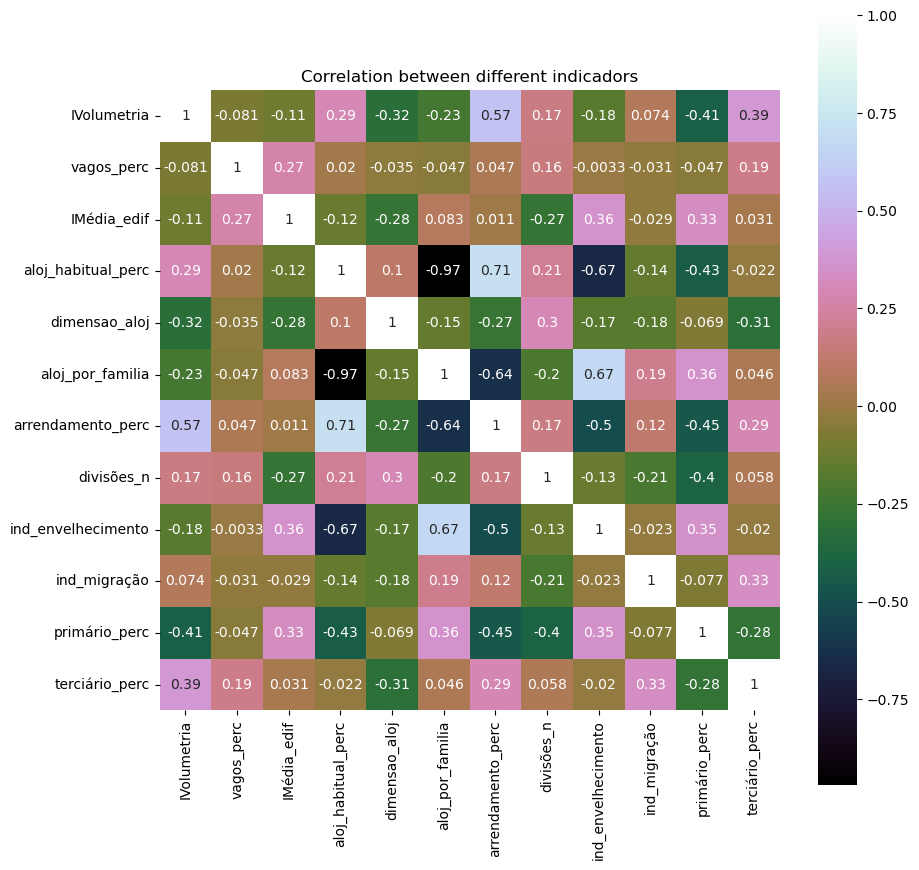

In [32]:
#another way to represent the correlation matrix of the 12 indicators
correlation = df_BGRI[indicators_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, square = True, annot = True, cmap='cubehelix')
plt.title('Correlation between different indicadors')

c:\Users\JLM\anaconda3\envs\EOAD\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


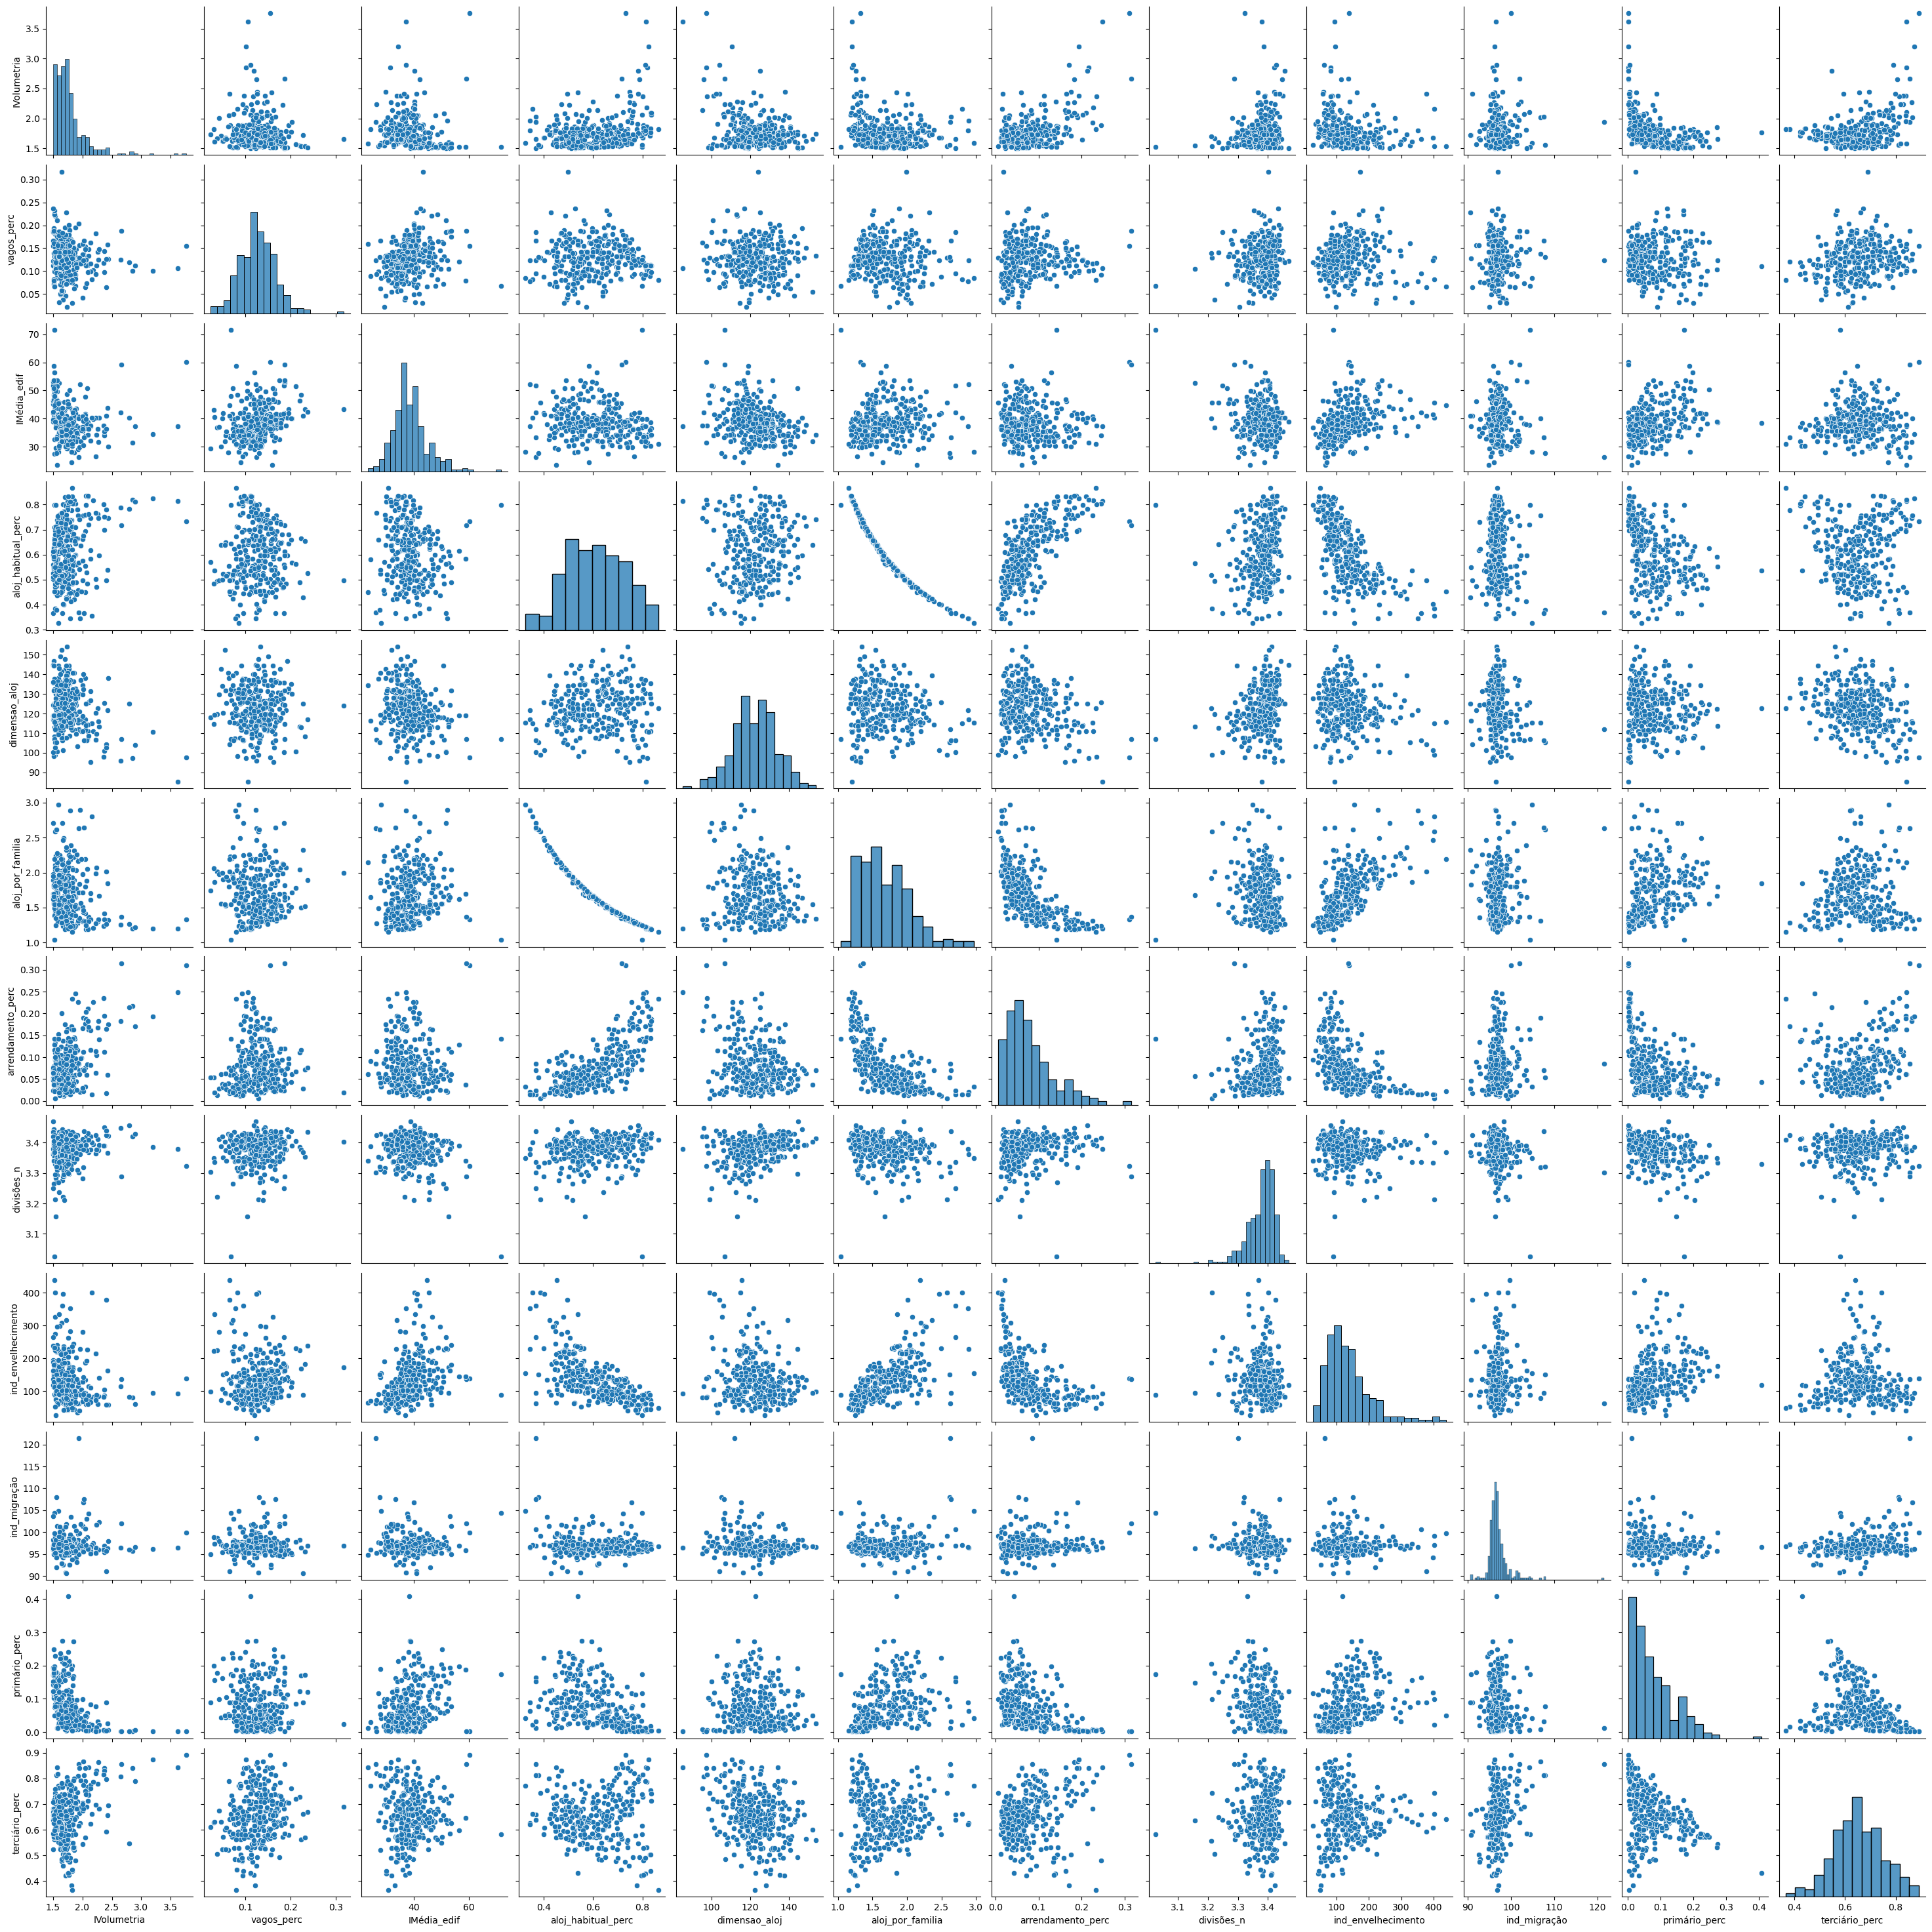

In [33]:
#another way to represent the correlation matrix of the 12 indicators
sns.pairplot(df_BGRI[indicators_list])

### Bartlett’s Test of Sphericity and KMO Test

Checks whether the correlation is present in the given data.  Before performing a factor analysis it is necessary to assess whether it is feasible, that is, whether or not we can find common factors in the data set.

There are two methods to verify this viability:

* <font color='slategrey'>Bartlett’s Test of Sphericity</font>

Compares the correlation matrix to the identity matrix. If the test is statistically insignificant, the application of the factor analysis is not recommended.

    The null hypothesis (H0) assumes that no correlation is present among the variables. ie., the correlation matrix is an     Identical matrix.

The idea is to reject this null hypothesis because the aim of factor analysis is explaining the common variance i.e. the variation due to correlation among the variables. If the p test statistic value is less than 0.05, we can decide that the correlation is not an Identical matrix i.e. correlation is present among the variables with a 95% confidence level.

* <font color='slategrey'>Kaiser-Meyer-Olkin Test (KMO)</font

Estimates the proportion of the variance among all observed variables
The KMO values range from 0 to 1. 

Values of less than 0.6 are considered inappropriate for the application of the analysis

  * For reference, Kaiser put the following values on the results:

      - 0.00 to 0.49 unacceptable
      - 0.50 to 0.59 miserable.
      - 0.60 to 0.69 mediocre.
      - 0.70 to 0.79 middling.
      - 0.80 to 0.89 meritorious.
      - 0.90 to 1.00 marvelous.

In [34]:
#Bartlett's Test Aplication of the 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_BGRI[indicators_list])
chi_square_value, p_value

(2152.4556290289943, 0.0)

In [35]:
#KMO Aplication 
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_BGRI[indicators_list])
kmo_model

c:\Users\JLM\anaconda3\envs\EOAD\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.6804208615584314

**Normalization**

In [36]:
df_ind

CONCELHO_DSG  DICO  IVolumetria  vagos_perc  IMédia_edif  \
0              ABRANTES  1401     1.690642    0.171649    45.844781   
1       AGUIAR DA BEIRA   901     1.765200    0.165985    36.630527   
2             ALANDROAL   701     1.505483    0.111849    45.180946   
3    ALBERGARIA-A-VELHA   102     1.709911    0.141594    38.206607   
4             ALBUFEIRA   801     1.935741    0.123953    26.366860   
..                  ...   ...          ...         ...          ...   
302             VOUZELA  1824     1.706365    0.142644    39.883460   
303              ÁGUEDA   101     1.727331    0.125995    36.098455   
304               ÉVORA   705     1.647006    0.123435    41.902955   
305              ÍLHAVO   110     1.732342    0.107229    34.179669   
306              ÓBIDOS  1012     1.603669    0.132491    30.288921   

     aloj_habitual_perc  dimensao_aloj  aloj_por_familia  arrendamento_perc  \
0              0.622193     116.877126          1.597774           0.076419   
1              0.430703     126.414646          2.317385           0.022550   
2              0.526910     119.028595          1.896262           0.047143   
3              0.740167     136.912475          1.334379           0.073650   
4              0.368015     111.945182          2.631060           0.085079   
..                  ...            ...               ...                ...   
302            0.574002     125.455611          1.730036           0.025805   
303            0.759953     144.409544          1.309689           0.083476   
304            0.766163     113.679540          1.287038           0.200418   
305            0.655794     136.934586          1.505857           0.097153   
306            0.499834     131.781354          1.964099           0.049689   

     divisões_n  ind_envelhecimento  ind_migração  primário_perc  \
0      3.425080          154.486503     96.005086       0.035101   
1      3.385277          181.707317     97.094829       0.127109   
2      3.364333          194.846491     96.115009       0.172012   
3      3.380305           86.858669     96.075558       0.020849   
4      3.300647           62.331636    121.431371       0.012569   
..          ...                 ...           ...            ...   
302    3.357612          151.411827     94.793639       0.081607   
303    3.385597          101.843167     96.421463       0.013858   
304    3.360169          101.721625     98.612976       0.041993   
305    3.412107           79.139891     95.287321       0.042667   
306    3.397098          113.847502     98.963643       0.099429   

     terciário_perc  
0          0.674052  
1          0.626547  
2          0.524781  
3          0.532011  
4          0.855378  
..              ...  
302        0.526023  
303        0.492452  
304        0.782192  
305        0.652983  
306        0.689867  

[307 rows x 14 columns]

In [37]:
# Create a DataFrame with the columns you want to normalize
df_to_normalize = df_ind[['IVolumetria', 'vagos_perc', 'IMédia_edif',
                          'aloj_habitual_perc', 'dimensao_aloj', 'aloj_por_familia',
                          'arrendamento_perc', 'divisões_n', 'ind_envelhecimento', 'ind_migração',
                          'primário_perc', 'terciário_perc']]

# Perform the normalization
df_normalized = (df_to_normalize - df_to_normalize.mean()) / df_to_normalize.std()

# Add back the columns you didn't want to normalize
df_normalized[['CONCELHO_DSG', 'DICO']] = df_ind[['CONCELHO_DSG', 'DICO']]

df_normalized


IVolumetria  vagos_perc  IMédia_edif  aloj_habitual_perc  dimensao_aloj  \
0      -0.322278    1.160096     1.115438            0.101332      -0.512341   
1      -0.067211    1.014666    -0.346942           -1.501508       0.344865   
2      -0.955720   -0.375466     1.010082           -0.696218      -0.318972   
3      -0.256357    0.388342    -0.096805            1.088823       1.288381   
4       0.516223   -0.064673    -1.975872           -2.026230      -0.955610   
..           ...         ...          ...                 ...            ...   
302    -0.268489    0.415306     0.169326           -0.302039       0.258670   
303    -0.196761   -0.012220    -0.431386            1.254437       1.962197   
304    -0.471560   -0.077967     0.489837            1.306418      -0.799731   
305    -0.179619   -0.494111    -0.735914            0.382585       1.290369   
306    -0.619820    0.154592    -1.353408           -0.922858       0.827210   

     aloj_por_familia  arrendamento_perc  divisões_n  ind_envelhecimento  \
0           -0.259810          -0.079522    0.980861            0.273038   
1            1.724697          -1.057734    0.171904            0.665157   
2            0.563345          -0.611161   -0.253776            0.854428   
3           -0.986188          -0.129811    0.070841           -0.701149   
4            2.589733           0.077727   -1.548122           -1.054464   
..                ...                ...         ...                 ...   
302          0.104935          -0.998622   -0.390361            0.228747   
303         -1.054278           0.048615    0.178405           -0.485296   
304         -1.116744           2.172170   -0.338397           -0.487047   
305         -0.513294           0.296986    0.717191           -0.812339   
306          0.750423          -0.564925    0.412142           -0.312372   

     ind_migração  primário_perc  terciário_perc        CONCELHO_DSG  DICO  
0       -0.377827      -0.647787        0.222718            ABRANTES  1401  
1        0.039468       0.762671       -0.262725     AGUIAR DA BEIRA   901  
2       -0.335734       1.451014       -1.302647           ALANDROAL   701  
3       -0.350841      -0.866272       -1.228768  ALBERGARIA-A-VELHA   102  
4        9.358638      -0.993200        2.075660           ALBUFEIRA   801  
..            ...            ...             ...                 ...   ...  
302     -0.841725       0.065134       -1.289956             VOUZELA  1824  
303     -0.218384      -0.973440       -1.633015              ÁGUEDA   101  
304      0.620810      -0.542130        1.327789               ÉVORA   705  
305     -0.652680      -0.531811        0.007423              ÍLHAVO   110  
306      0.755091       0.338339        0.384331              ÓBIDOS  1012  

[307 rows x 14 columns]

### Communalities

Proportion of the variance of each variable that is explained by the selected factors - are the sum of the squared loadings for each variable.

After extraction, the communities range between 0 and 1,

Values close to 0 when the common factors explain no variance of the variable
Values close to 1 when they explain all of its variance - represents more variance

In [38]:
#to calculate the Communalities 
fa = FactorAnalyzer(method = 'principal', rotation= 'varimax')
fa.fit(df_normalized[indicators_list])

# Get communalities
communalities = fa.get_communalities()

# Create a DataFrame for better visualization
communalities_df = pd.DataFrame({
    'Variable': indicators_list,
    'Communality': communalities
})

print(communalities_df)

              Variable  Communality
0          IVolumetria     0.593070
1           vagos_perc     0.078542
2          IMédia_edif     0.682928
3   aloj_habitual_perc     0.934188
4        dimensao_aloj     0.649596
5     aloj_por_familia     0.928117
6    arrendamento_perc     0.833510
7           divisões_n     0.410701
8   ind_envelhecimento     0.610388
9         ind_migração     0.342632
10       primário_perc     0.644263
11      terciário_perc     0.625170


## Determining the number of factors

### Eingenvalues

The eigenvalue is a good criterion for determining the number of factors. Generally, an eigenvalue greater than 1 will be considered as selection criteria for the feature.


Scree plot the eigenvalues of our initial solution (A factor with an eigenvalue of 1 accounts for at least the variance of a single feature)

### Scree plot
The graphical approach is based on the visual representation of factors' eigenvalues also called scree plot. This scree plot helps us to determine the number of factors where the curve makes an elbow.

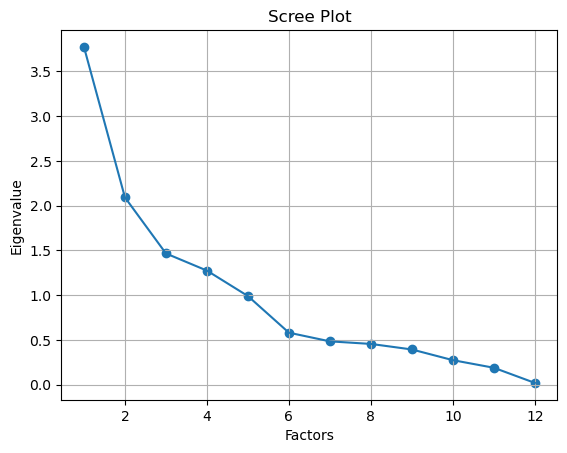

In [39]:
#Extract eigenvalues and create the Scree Plot
eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1,df_normalized[indicators_list].shape[1]+1),eigen_values)
plt.plot(range(1,df_normalized[indicators_list].shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Explained variance

The total <font color='slategrey'>variance explained</font> must be conveniently greater than 70%

In [40]:
#to calculate the explained variances
tot = sum(eigen_values)
var_exp = [(i / tot)*100 for i in sorted(eigen_values,reverse=True)]

# Calculate cumulative explained variance
cum_var_exp = [sum(var_exp[:i+1]) for i in range(len(var_exp))]

# Create a DataFrame for better visualization
explained_var_df = pd.DataFrame({
    'Component': [f'Component {i+1}' for i in range(len(var_exp))],
    'Explained Variance': var_exp,
    'Cumulative Explained Variance': cum_var_exp
})

print(explained_var_df)


       Component  Explained Variance  Cumulative Explained Variance
0    Component 1           31.448414                      31.448414
1    Component 2           17.438219                      48.886633
2    Component 3           12.222571                      61.109204
3    Component 4           10.625822                      71.735026
4    Component 5            8.256376                      79.991402
5    Component 6            4.845870                      84.837272
6    Component 7            4.039484                      88.876756
7    Component 8            3.799989                      92.676745
8    Component 9            3.284542                      95.961287
9   Component 10            2.288158                      98.249445
10  Component 11            1.580650                      99.830095
11  Component 12            0.169905                     100.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


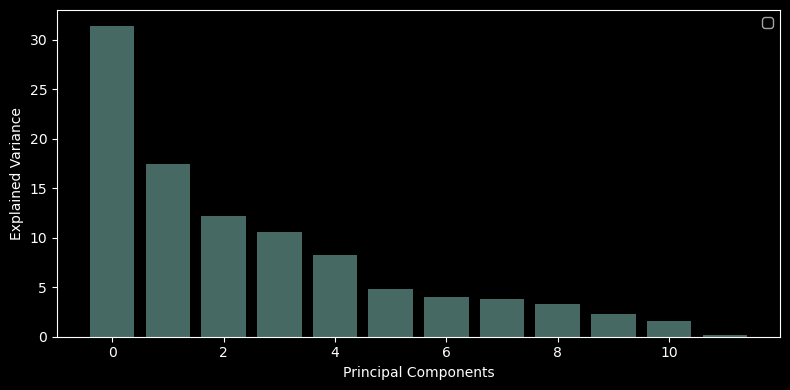

In [41]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 4))
    plt.bar(range(12), var_exp, alpha=0.5, align='center')
    plt.ylabel('Explained Variance')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

## Interpreting the Loadings of the factors

Loadings indicate how much a factor explains a variable and are cucial to classify the factors, since they indicate the correlation between each of the initial variables and the factors created The loading score will range from -1 to 1. Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable.

In [42]:
#factor extraction - no rotation
fa = FactorAnalyzer(n_factors = 5, rotation=None, method = 'principal')
fa.fit(df_normalized[indicators_list])

# Get factor loadings
loadings = fa.loadings_ # The underscore is a naming convention to help differentiate between parameters that are set during initialization and attributes that are learned from the data

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=[f'Factor {i+1}' for i in range(5)], index=indicators_list)

print(loadings_df)

                    Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
IVolumetria         0.538040  0.515655 -0.194120 -0.046526 -0.437479
vagos_perc          0.038714  0.142409  0.238250  0.786041  0.392126
IMédia_edif        -0.296337  0.330943  0.696842  0.286512 -0.039474
aloj_habitual_perc  0.892495 -0.180700  0.324019 -0.071758  0.028526
dimensao_aloj       0.048460 -0.763300 -0.254206  0.128474  0.264492
aloj_por_familia   -0.851752  0.242614 -0.379176  0.042865 -0.053845
arrendamento_perc   0.817810  0.351176  0.203400 -0.055779 -0.061044
divisões_n          0.386904 -0.264909 -0.436841  0.567926 -0.209941
ind_envelhecimento -0.747658  0.219104 -0.058212  0.226478 -0.328074
ind_migração       -0.033611  0.518877 -0.268828 -0.309606  0.622055
primário_perc      -0.669145 -0.100983  0.431636 -0.167832  0.006040
terciário_perc      0.210347  0.708380 -0.281287  0.220284  0.167224


**Rotation**:
is a process that allows analysts to make a PCA/FA solution more interpretable.  Any rotation has a goal.  Orthogonal rotations require that factor should not be correlated. The goal of orthogonal rotation is generalizability and simplicity.  In contrast, oblique rotations allow for correlated factors and their goal is to produce the best fit. (Rotation Techniques: Varimax, Quartimax, Oblimax, Equimax - https://www.datasklr.com/principal-component-analysis-and-factor-analysis/factor-analysis)

In [43]:
# Factor extraction with Varimax rotation
fa_rot = FactorAnalyzer(n_factors=5, rotation='varimax', method='principal')
fa_rot.fit(df_normalized[indicators_list])

# Get factor loadings
loadings_rot = fa_rot.loadings_  # The underscore is a naming convention to help differentiate between parameters that are set during initialization and attributes that are learned from the data

# Create a DataFrame for better visualization
loadings_rot_df = pd.DataFrame(loadings_rot, columns=[f'Factor {i+1}' for i in range(5)], index=indicators_list)

#print(loadings_rot_df)

###------------

# Function to highlight different weights
def highlight_weights(val):
    color = 'red' if abs(val) > 0.7 else ('orange' if abs(val) > 0.5 else 'black')
    return f'color: {color}'

# Apply the styling
styled_df = loadings_rot_df.style.applymap(highlight_weights)

# To display in Jupyter Notebook
styled_df


C:\Users\JLM\AppData\Local\Temp\ipykernel_30056\1969673828.py:21: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = loadings_rot_df.style.applymap(highlight_weights)


## Extraction of the new factor values (scores) 

Factor values can be estimated as linear combinations of the original variables.
The factors are expressed as standardized values of mean 0 and standard deviation 1 (z-scores)  

In [44]:
#returns the scores for the selected row
scores = fa.transform(df_normalized[indicators_list])
scores

array([[ 0.11444998,  0.22836454,  0.4620521 ,  1.61845077, -0.05975876],
       [-1.20743731, -0.04420567, -0.7864351 ,  0.81416685,  0.19407785],
       [-1.1718734 , -0.43545875,  0.99815771, -0.21303486, -0.516806  ],
       ...,
       [ 1.14324206,  0.99295758,  0.89322093, -0.29515759,  0.75361703],
       [ 0.65042089, -1.01883156, -0.59200103,  0.01977389, -0.01662422],
       [-0.42177403, -0.37058137, -1.38059391, -0.03442331,  1.13604893]])

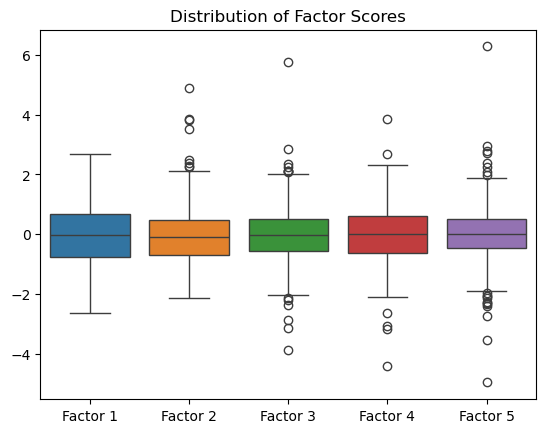

In [45]:
# Convert scores to DataFrame for easier plotting
scores_df = pd.DataFrame(scores, columns=[f'Factor {i+1}' for i in range(scores.shape[1])])

sns.boxplot(data=scores_df)
plt.title('Distribution of Factor Scores')
plt.show()


In [46]:
#to set the scores as columns for each observation in the  datafaframe
def set_scores_factors(dataframe, scores):
  for i in list(range(len(scores[0]))):
    serie_factor = []
    for e in scores:
      serie_factor.append(e[i])
    dataframe["factor_{}".format(i+1)] = pd.Series(serie_factor,dataframe.index) 
  return dataframe

df_normalized = set_scores_factors(df_normalized, scores)
df_normalized

IVolumetria  vagos_perc  IMédia_edif  aloj_habitual_perc  dimensao_aloj  \
0      -0.322278    1.160096     1.115438            0.101332      -0.512341   
1      -0.067211    1.014666    -0.346942           -1.501508       0.344865   
2      -0.955720   -0.375466     1.010082           -0.696218      -0.318972   
3      -0.256357    0.388342    -0.096805            1.088823       1.288381   
4       0.516223   -0.064673    -1.975872           -2.026230      -0.955610   
..           ...         ...          ...                 ...            ...   
302    -0.268489    0.415306     0.169326           -0.302039       0.258670   
303    -0.196761   -0.012220    -0.431386            1.254437       1.962197   
304    -0.471560   -0.077967     0.489837            1.306418      -0.799731   
305    -0.179619   -0.494111    -0.735914            0.382585       1.290369   
306    -0.619820    0.154592    -1.353408           -0.922858       0.827210   

     aloj_por_familia  arrendamento_perc  divisões_n  ind_envelhecimento  \
0           -0.259810          -0.079522    0.980861            0.273038   
1            1.724697          -1.057734    0.171904            0.665157   
2            0.563345          -0.611161   -0.253776            0.854428   
3           -0.986188          -0.129811    0.070841           -0.701149   
4            2.589733           0.077727   -1.548122           -1.054464   
..                ...                ...         ...                 ...   
302          0.104935          -0.998622   -0.390361            0.228747   
303         -1.054278           0.048615    0.178405           -0.485296   
304         -1.116744           2.172170   -0.338397           -0.487047   
305         -0.513294           0.296986    0.717191           -0.812339   
306          0.750423          -0.564925    0.412142           -0.312372   

     ind_migração  primário_perc  terciário_perc        CONCELHO_DSG  DICO  \
0       -0.377827      -0.647787        0.222718            ABRANTES  1401   
1        0.039468       0.762671       -0.262725     AGUIAR DA BEIRA   901   
2       -0.335734       1.451014       -1.302647           ALANDROAL   701   
3       -0.350841      -0.866272       -1.228768  ALBERGARIA-A-VELHA   102   
4        9.358638      -0.993200        2.075660           ALBUFEIRA   801   
..            ...            ...             ...                 ...   ...   
302     -0.841725       0.065134       -1.289956             VOUZELA  1824   
303     -0.218384      -0.973440       -1.633015              ÁGUEDA   101   
304      0.620810      -0.542130        1.327789               ÉVORA   705   
305     -0.652680      -0.531811        0.007423              ÍLHAVO   110   
306      0.755091       0.338339        0.384331              ÓBIDOS  1012   

     factor_1  factor_2  factor_3  factor_4  factor_5  
0    0.114450  0.228365  0.462052  1.618451 -0.059759  
1   -1.207437 -0.044206 -0.786435  0.814167  0.194078  
2   -1.171873 -0.435459  0.998158 -0.213035 -0.516806  
3    0.679052 -1.297802  0.357543  0.162271  0.492649  
4   -0.573333  3.810093 -3.867339 -3.066144  6.273778  
..        ...       ...       ...       ...       ...  
302 -0.517653 -0.811298  0.435001  0.234234 -0.347041  
303  0.775277 -1.691815  0.068412 -0.115633  0.418376  
304  1.143242  0.992958  0.893221 -0.295158  0.753617  
305  0.650421 -1.018832 -0.592001  0.019774 -0.016624  
306 -0.421774 -0.370581 -1.380594 -0.034423  1.136049  

[307 rows x 19 columns]

In [47]:
# creation of an array of factor scores
factor_list = ['factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5']
df_normalized[factor_list]

factor_1  factor_2  factor_3  factor_4  factor_5
0    0.114450  0.228365  0.462052  1.618451 -0.059759
1   -1.207437 -0.044206 -0.786435  0.814167  0.194078
2   -1.171873 -0.435459  0.998158 -0.213035 -0.516806
3    0.679052 -1.297802  0.357543  0.162271  0.492649
4   -0.573333  3.810093 -3.867339 -3.066144  6.273778
..        ...       ...       ...       ...       ...
302 -0.517653 -0.811298  0.435001  0.234234 -0.347041
303  0.775277 -1.691815  0.068412 -0.115633  0.418376
304  1.143242  0.992958  0.893221 -0.295158  0.753617
305  0.650421 -1.018832 -0.592001  0.019774 -0.016624
306 -0.421774 -0.370581 -1.380594 -0.034423  1.136049

[307 rows x 5 columns]

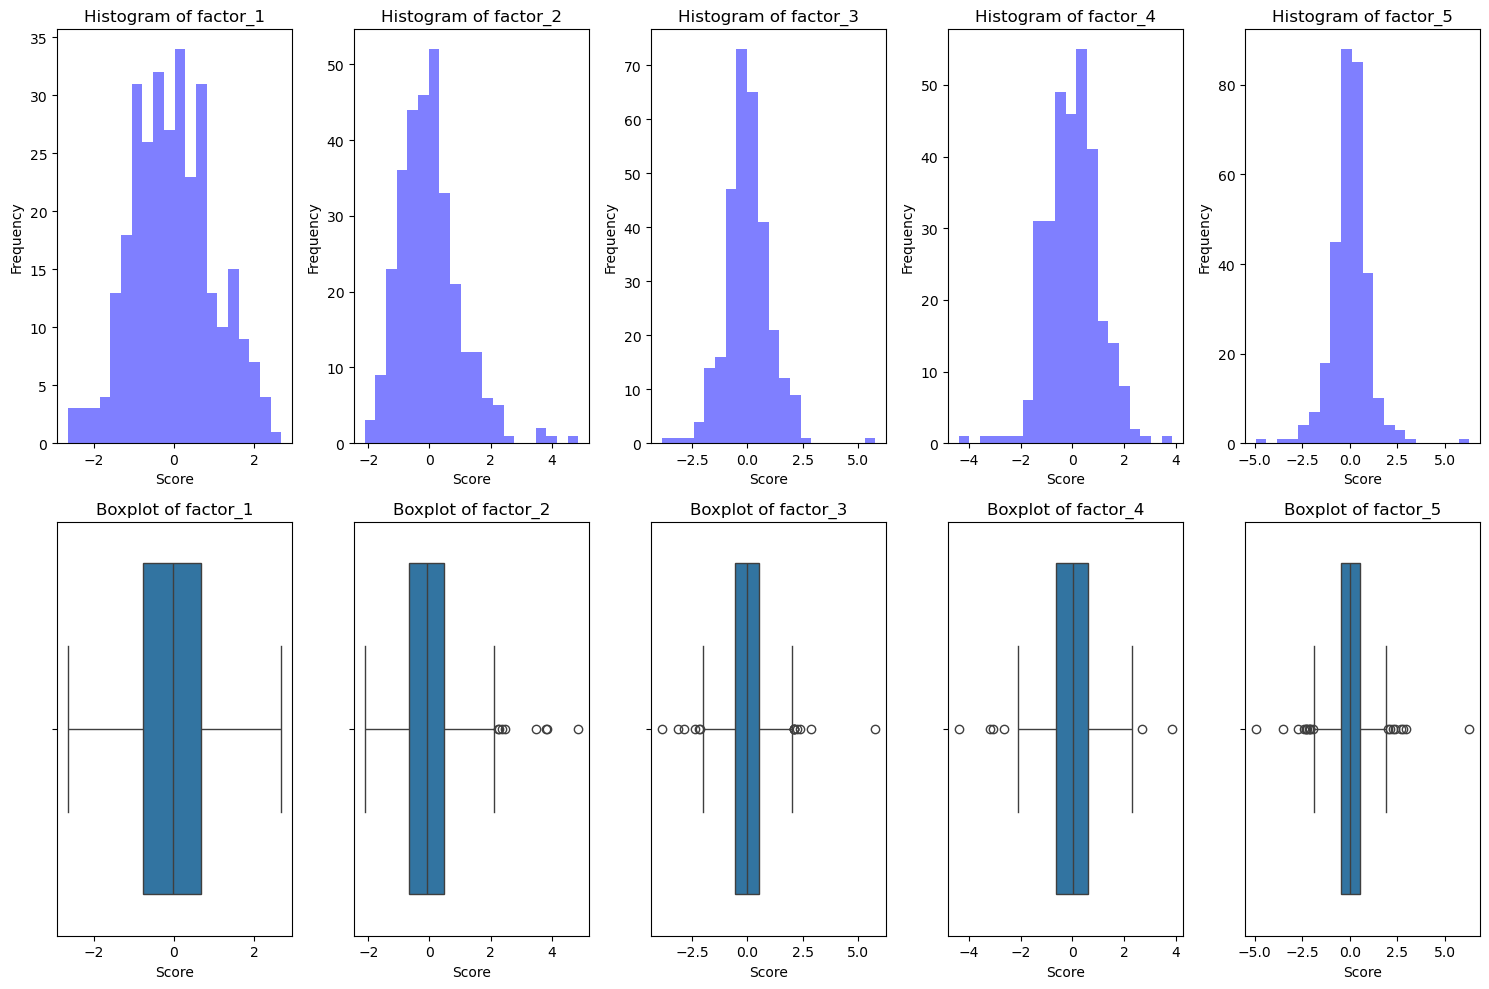

In [48]:
# Create subplots: 2 rows and as many columns as there are factors
fig, axes = plt.subplots(2, len(factor_list), figsize=(15, 10))

# Loop through each factor to create the plots
for i, factor in enumerate(factor_list):
    # Histogram
    axes[0, i].hist(df_normalized[factor], bins=20, alpha=0.5, color='blue')
    axes[0, i].set_title(f'Histogram of {factor}')
    axes[0, i].set_xlabel('Score')
    axes[0, i].set_ylabel('Frequency')
    
    # Boxplot
    sns.boxplot(x=df_normalized[factor], ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot of {factor}')
    axes[1, i].set_xlabel('Score')

plt.tight_layout()
plt.show()


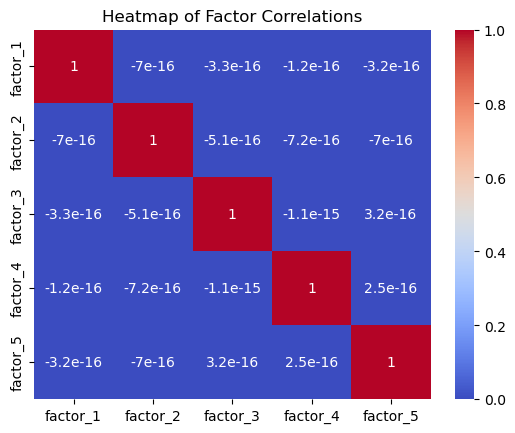

In [49]:
#correlation between factor
correlation_matrix = df_normalized[factor_list].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Factor Correlations')
plt.show()


c:\Users\JLM\anaconda3\envs\EOAD\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


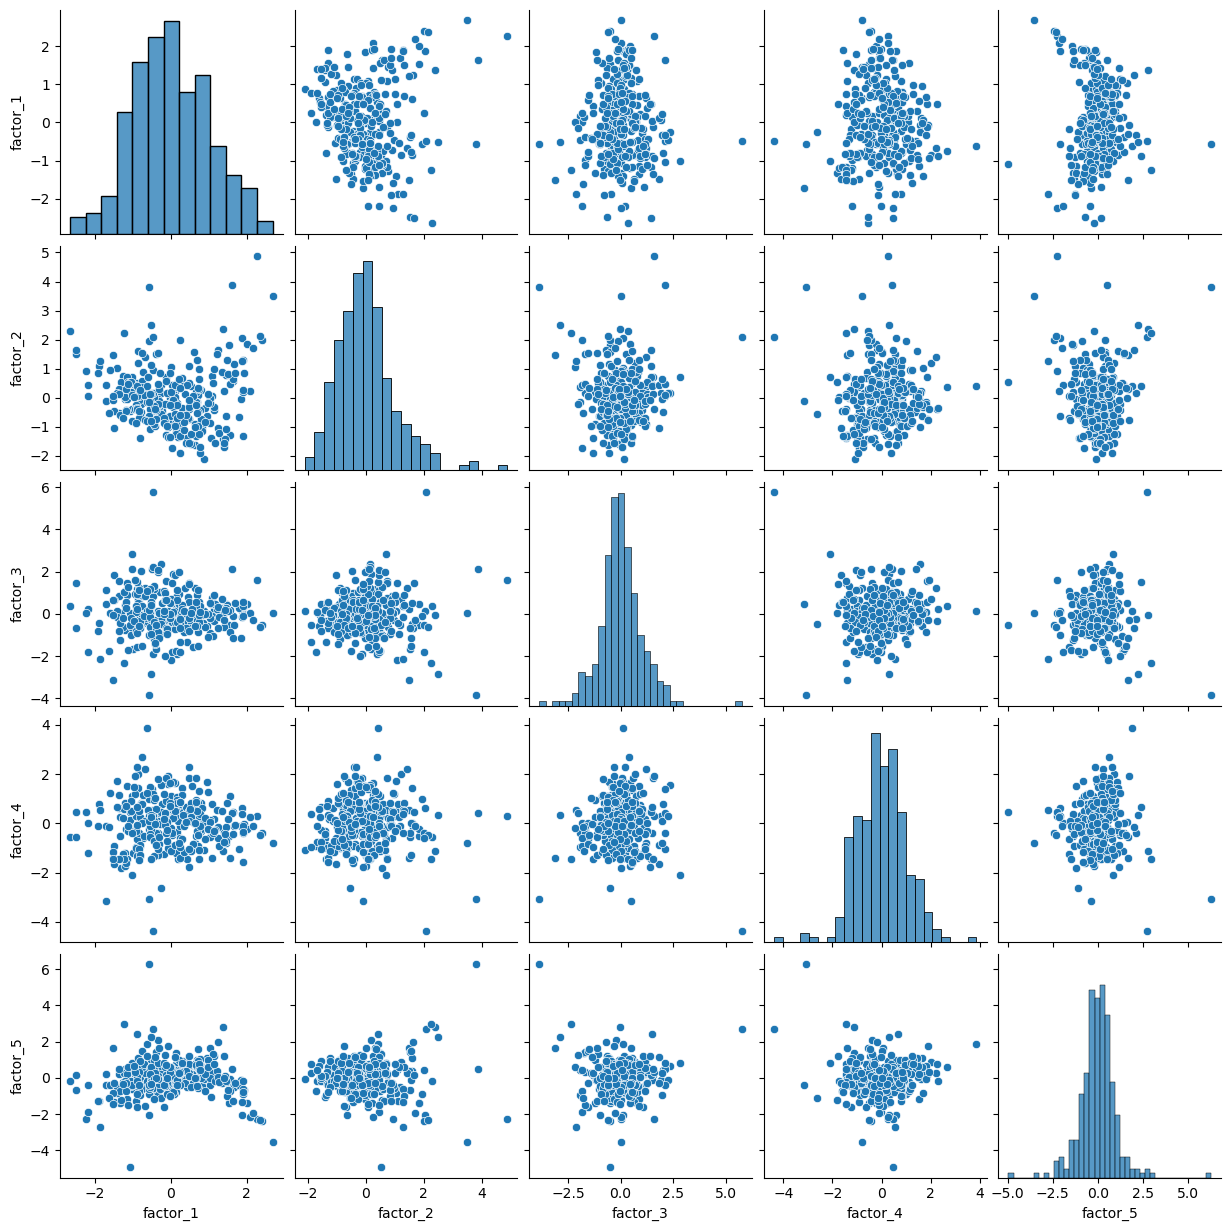

In [50]:
g = sns.pairplot(df_normalized[factor_list])

# **2. Cluster Analysis**

<font color='slategrey'>Cluster analysis</font> is a multivariate statistical method to organise items into groups, based on how closely associated they are.
The idea is to find similar groups of subjects, where “similarity” between each pair of subjects means some global measure over the whole set of characteristics.

## K-Means 

In [51]:
# Create a KMeans instance with the number of clusters you want (e.g., 3)
kmeans = KMeans(n_clusters=3)

# Fit the model
kmeans.fit(df_normalized[factor_list])

# Get the cluster assignments for each data point
df_normalized['cluster'] = kmeans.labels_

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Now, df_BGRIzsc has an additional column named 'cluster' containing the cluster assignments.
df_normalized['cluster']

c:\Users\JLM\anaconda3\envs\EOAD\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JLM\anaconda3\envs\EOAD\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\JLM\anaconda3\envs\EOAD\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\JLM\anaconda3\envs\EOAD\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on W

0      1
1      2
2      2
3      1
4      0
      ..
302    2
303    1
304    0
305    1
306    1
Name: cluster, Length: 307, dtype: int32

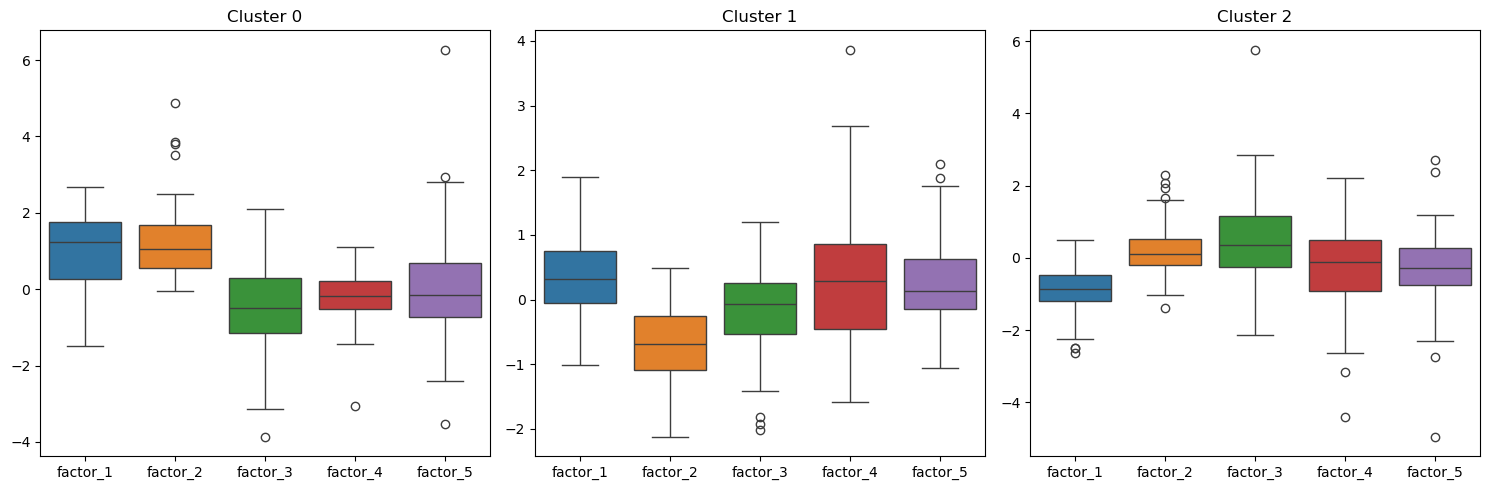

In [52]:
# Create a figure and a grid of subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Loop over each cluster
for cluster_id in range(3):
    # Filter data by cluster
    cluster_data = df_normalized[df_normalized['cluster'] == cluster_id]
    
    # Create a boxplot for the filtered data
    sns.boxplot(data=cluster_data[['factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5']], ax=ax[cluster_id])
    
    # Set the title for this subplot
    ax[cluster_id].set_title(f'Cluster {cluster_id}')

plt.tight_layout()
plt.show()


## Hierarchical Clustering

The scipy library contains tools for doing hierarchical clustering and building dendrograms
https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

In [53]:
df_normalized

IVolumetria  vagos_perc  IMédia_edif  aloj_habitual_perc  dimensao_aloj  \
0      -0.322278    1.160096     1.115438            0.101332      -0.512341   
1      -0.067211    1.014666    -0.346942           -1.501508       0.344865   
2      -0.955720   -0.375466     1.010082           -0.696218      -0.318972   
3      -0.256357    0.388342    -0.096805            1.088823       1.288381   
4       0.516223   -0.064673    -1.975872           -2.026230      -0.955610   
..           ...         ...          ...                 ...            ...   
302    -0.268489    0.415306     0.169326           -0.302039       0.258670   
303    -0.196761   -0.012220    -0.431386            1.254437       1.962197   
304    -0.471560   -0.077967     0.489837            1.306418      -0.799731   
305    -0.179619   -0.494111    -0.735914            0.382585       1.290369   
306    -0.619820    0.154592    -1.353408           -0.922858       0.827210   

     aloj_por_familia  arrendamento_perc  divisões_n  ind_envelhecimento  \
0           -0.259810          -0.079522    0.980861            0.273038   
1            1.724697          -1.057734    0.171904            0.665157   
2            0.563345          -0.611161   -0.253776            0.854428   
3           -0.986188          -0.129811    0.070841           -0.701149   
4            2.589733           0.077727   -1.548122           -1.054464   
..                ...                ...         ...                 ...   
302          0.104935          -0.998622   -0.390361            0.228747   
303         -1.054278           0.048615    0.178405           -0.485296   
304         -1.116744           2.172170   -0.338397           -0.487047   
305         -0.513294           0.296986    0.717191           -0.812339   
306          0.750423          -0.564925    0.412142           -0.312372   

     ind_migração  primário_perc  terciário_perc        CONCELHO_DSG  DICO  \
0       -0.377827      -0.647787        0.222718            ABRANTES  1401   
1        0.039468       0.762671       -0.262725     AGUIAR DA BEIRA   901   
2       -0.335734       1.451014       -1.302647           ALANDROAL   701   
3       -0.350841      -0.866272       -1.228768  ALBERGARIA-A-VELHA   102   
4        9.358638      -0.993200        2.075660           ALBUFEIRA   801   
..            ...            ...             ...                 ...   ...   
302     -0.841725       0.065134       -1.289956             VOUZELA  1824   
303     -0.218384      -0.973440       -1.633015              ÁGUEDA   101   
304      0.620810      -0.542130        1.327789               ÉVORA   705   
305     -0.652680      -0.531811        0.007423              ÍLHAVO   110   
306      0.755091       0.338339        0.384331              ÓBIDOS  1012   

     factor_1  factor_2  factor_3  factor_4  factor_5  cluster  
0    0.114450  0.228365  0.462052  1.618451 -0.059759        1  
1   -1.207437 -0.044206 -0.786435  0.814167  0.194078        2  
2   -1.171873 -0.435459  0.998158 -0.213035 -0.516806        2  
3    0.679052 -1.297802  0.357543  0.162271  0.492649        1  
4   -0.573333  3.810093 -3.867339 -3.066144  6.273778        0  
..        ...       ...       ...       ...       ...      ...  
302 -0.517653 -0.811298  0.435001  0.234234 -0.347041        2  
303  0.775277 -1.691815  0.068412 -0.115633  0.418376        1  
304  1.143242  0.992958  0.893221 -0.295158  0.753617        0  
305  0.650421 -1.018832 -0.592001  0.019774 -0.016624        1  
306 -0.421774 -0.370581 -1.380594 -0.034423  1.136049        1  

[307 rows x 20 columns]

**Dendrogram** 

The following code is for generating a dendrogram using hierarchical clustering, specifically using the "ward" method. 
The dendrogram is a tree-like diagram that shows the arrangement of the clusters formed by the hierarchical clustering algorithm. 

*How to Interpret the Dendrogram:*
- The *x-axis* contains the individual data points (or clusters of data points as the algorithm proceeds).

- The y-axis represents the Euclidean distances between these points or clusters.

- Each *leaf* at the bottom of the dendrogram represents one data point, and as we move up the tree, leaves that are close to each other merge into branches, indicating that they belong to the same cluster.

- The *height* at which two branches merge represents the distance at which these clusters were combined. This is useful for determining the optimal number of clusters: we typically look for the longest vertical line that is not crossed by any extended horizontal lines (or with very few crossings), and we draw a horizontal line through it. The number of vertical lines it crosses gives you the optimal number of clusters.

*To represent the outputs or results, we can:*

- Use the dendrogram to decide on an optimal number of clusters.

- Use this number to run a final hierarchical clustering algorithm that assigns each data point to a cluster.

- Analyze these clusters further, perhaps by examining the mean or distribution of various features within each cluster.

- Optionally, we can visualize these clusters using scatter plots, box plots, or other types of graphs to understand their characteristics.

Report these findings as your final output or result

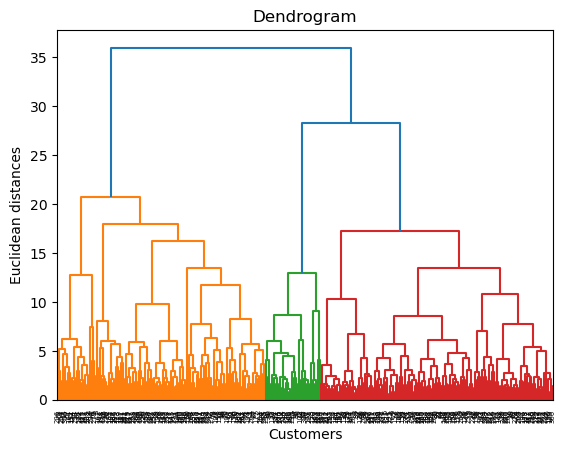

In [54]:
#dendogram using the 12 indicators 
dendrogram = sch.dendrogram(sch.linkage(df_normalized[indicators_list], method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

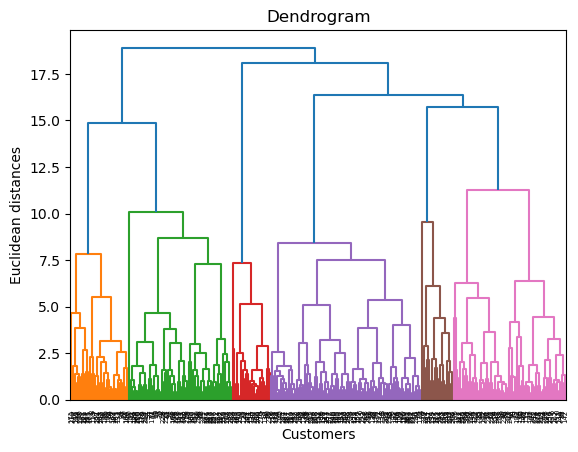

In [55]:
#dendogram using the 5 factors indicators
dendrogram = sch.dendrogram(sch.linkage(df_normalized[factor_list], method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

**Scatter plots** are useful for visualizing how clusters are distributed in a two-dimensional feature space. We can create scatter plots for different pairs of features to get a sense of how the clusters are separated.

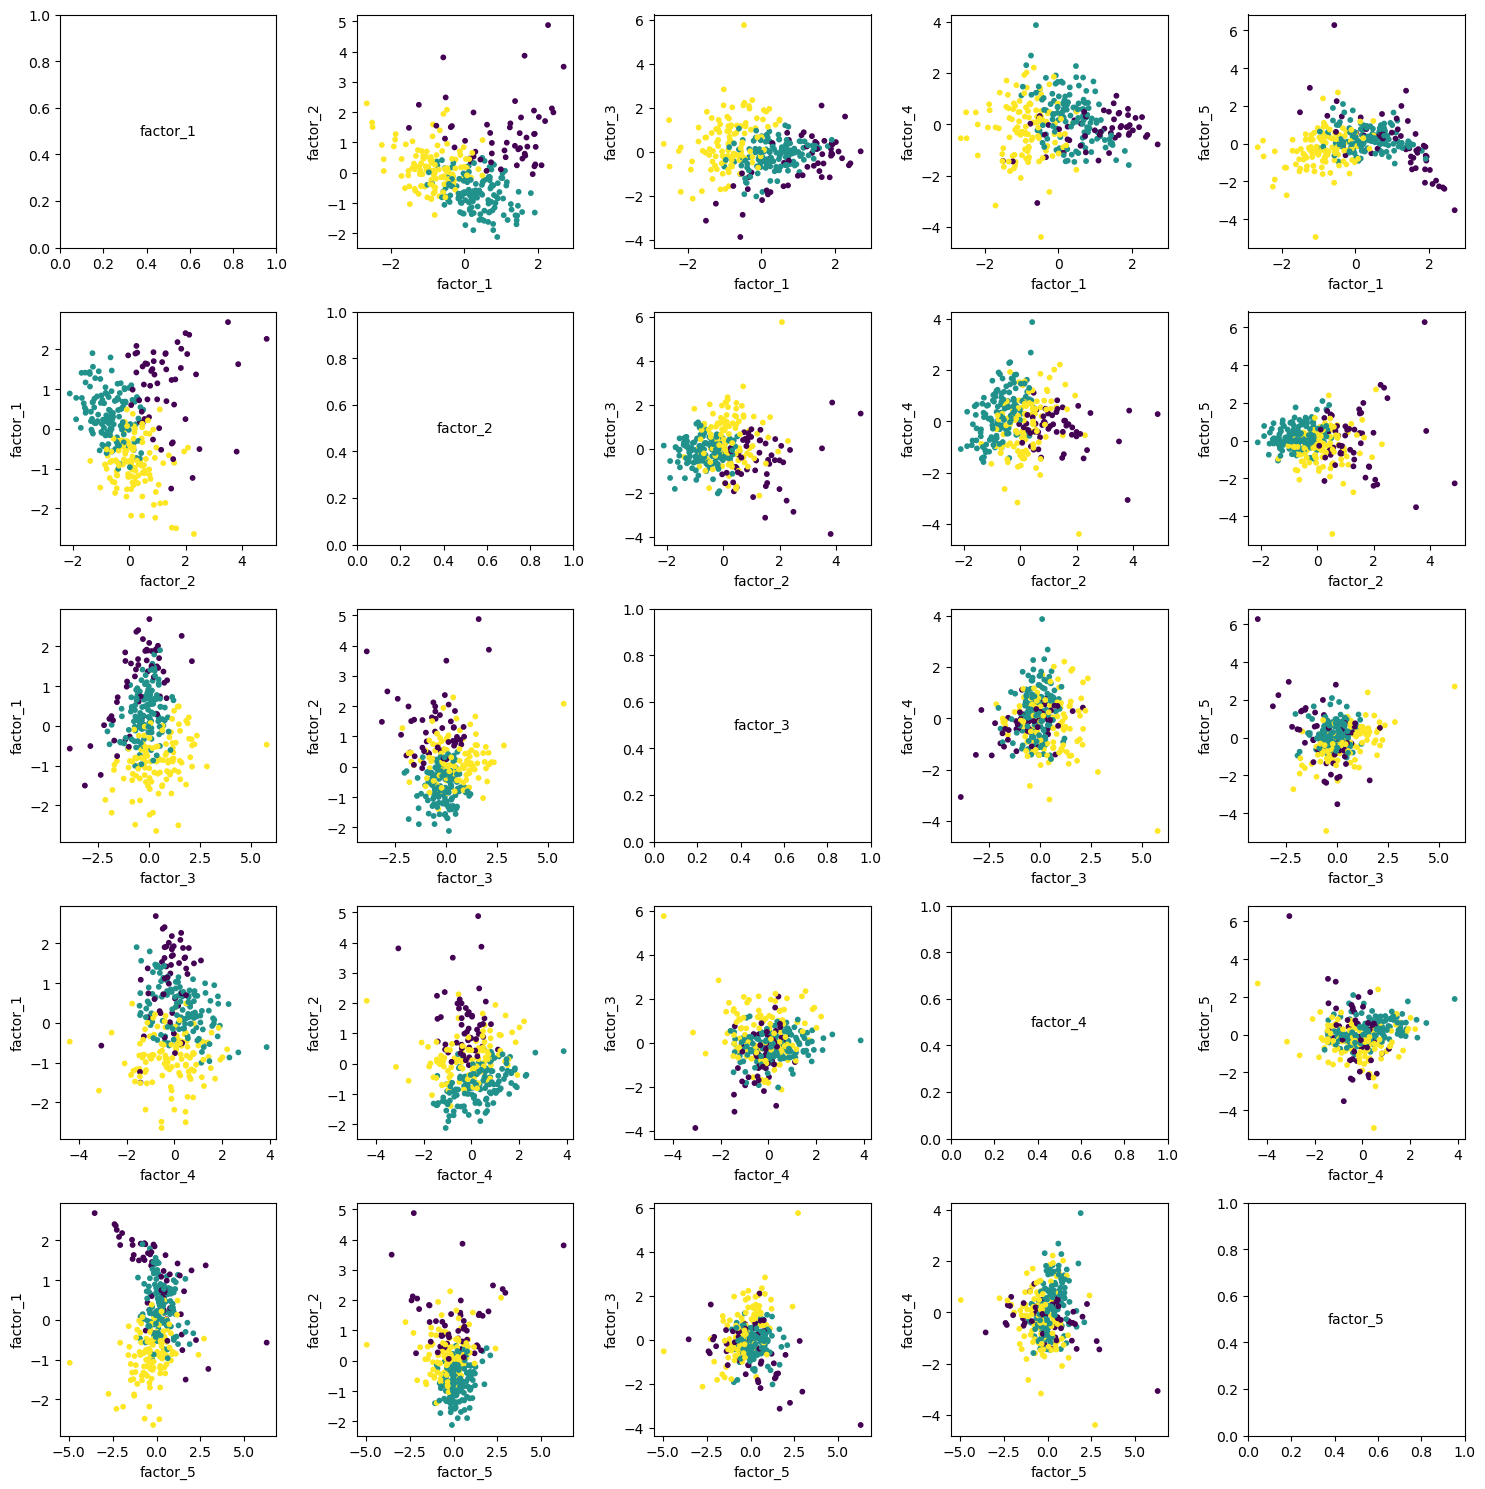

In [56]:
factors = ['factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5']
n = len(factors)

fig, axes = plt.subplots(n, n, figsize=(15, 15))

for i in range(n):
    for j in range(n):
        if i != j:
            axes[i, j].scatter(df_normalized[factors[i]], df_normalized[factors[j]], c=df_normalized['cluster'], cmap='viridis', s=10)
            axes[i, j].set_xlabel(factors[i])
            axes[i, j].set_ylabel(factors[j])
        else:
            axes[i, j].text(0.5, 0.5, factors[i], horizontalalignment='center', verticalalignment='center')
        
plt.tight_layout()
plt.show()


**Boxplot for each factor** ('factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5') against the cluster labels. Each boxplot will show the distribution of a single factor across the different clusters. 

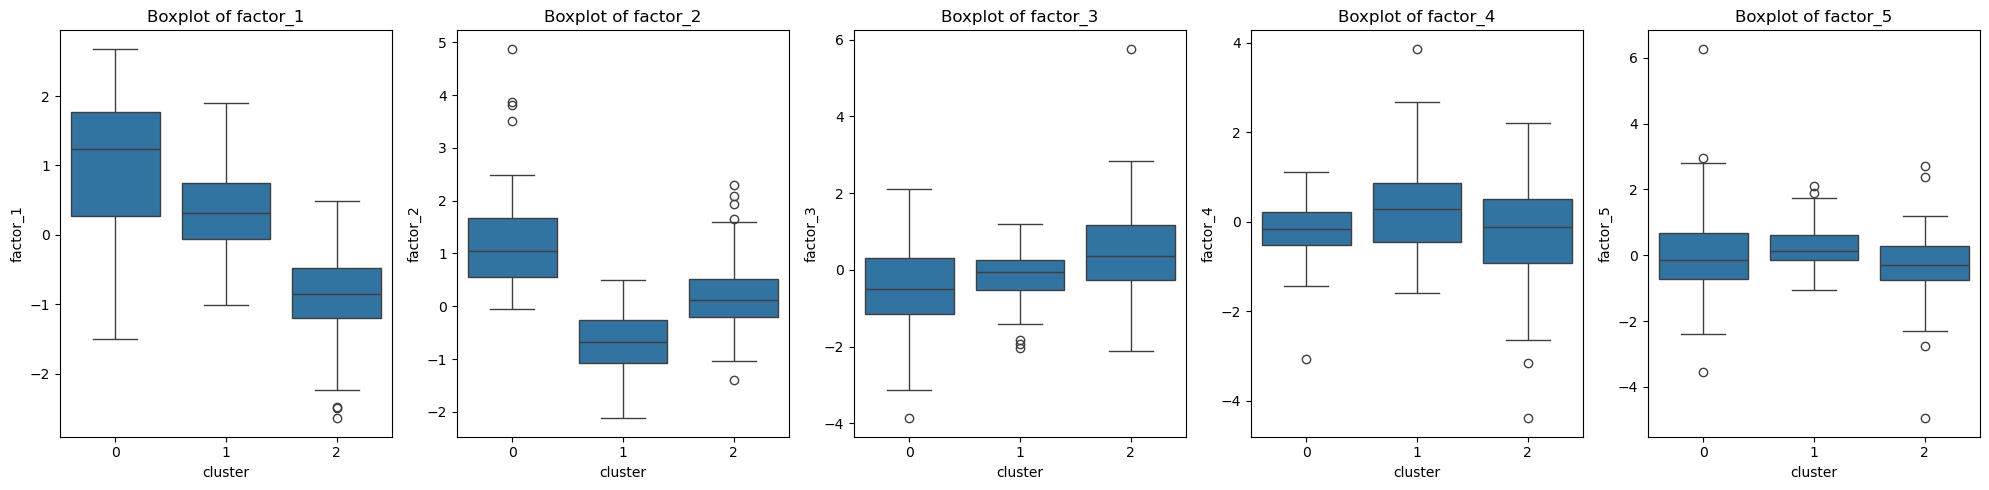

In [57]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, factor in enumerate(['factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5']):
    sns.boxplot(x='cluster', y=factor, data=df_normalized, ax=axes[i])
    axes[i].set_title(f'Boxplot of {factor}')

plt.tight_layout()
plt.show()


# **3. Regression**

**Regression Model on COVID-19 Confirmed Cases and Socioeconomic Indicators**
These regression models aim to investigate the relationship between the number of confirmed COVID-19 casesand various socioeconomic and demographic indicators at Municipal level.

Multiple or multivariate linear regression is a case of linear regression with two or more independent variables.
- The dependent features are called the dependent variables, outputs, or responses.
- The independent features are called the independent variables, inputs, or predictors.


<span style="color:red">M1:</span>

**Dependent Variable:**
 - *ConfirmadosAcumulado_Conc*: The accumulated number of confirmed COVID-19 

**Independent Variables**:
- IVolumetria
- vagos_perc
- IMédia_edif
- aloj_habitual_perc
- dimensao_aloj
- aloj_por_familia
- arrendamento_perc
- divisões_n-
- ind_envelhecimento
- ind_migração
- primário_perc
- terciário_perc
        

<span style="color:red">M2:</span>

**Dependent Variable:**
 - *ConfirmadosAcumulado_Conc*: The accumulated number of confirmed COVID-19 

**Independent Variables**:
- Factor 1
- Factor 2
- Factor 3
- Factor 4
- Factor 5

<span style="color:red">M3:</span>

**Dependent Variable:**
 - *confirmadospor10milhab*: The accumulated number of confirmed COVID-19 per 10thousand inabitants

**Independent Variables**:
- IVolumetria
- vagos_perc
- IMédia_edif
- aloj_habitual_perc
- dimensao_aloj
- aloj_por_familia
- arrendamento_perc
- divisões_n-
- ind_envelhecimento
- ind_migração
- primário_perc
- terciário_perc

<span style="color:red">M4:</span>

**Dependent Variable:**
 - *confirmadospor10milhab*: The accumulated number of confirmed COVID-19 per 10thousand inabitants

**Independent Variables**:
- Factor 1
- Factor 2
- Factor 3
- Factor 4
- Factor 5


**Loading and Merging COVID-19 Data with BGRI Data**
The merging is done based on the DICO column from the df_normalized DataFrame and the Dico column from the covid_19 DataFrame. The result is stored in a new DataFrame called df_BGRI_M_C19.

In [58]:
# Load COVID data
covid = pd.read_csv('COVID19_Concelhos.csv')
covid

OBJECTID  Dico               Concelho  população  \
0           1   101                 ÁGUEDA      47729   
1           2   102     ALBERGARIA-A-VELHA      25252   
2           3   103                 ANADIA      29150   
3           4   104                 AROUCA      22359   
4           5   105                 AVEIRO      78450   
..        ...   ...                    ...        ...   
303       304  4603      SÃO ROQUE DO PICO       3388   
304       305  4701                  HORTA      14994   
305       306  4801       LAJES DAS FLORES       1504   
306       307  4802  SANTA CRUZ DAS FLORES       2289   
307       308  4901                  CORVO        430   

     ConfirmadosAcumulado_Conc  confirmados por 10mil hab  
0                          202                  42.322278  
1                          153                  60.589260  
2                          111                  38.078902  
3                          272                 121.651237  
4                          626                  79.796048  
..                         ...                        ...  
303                          5                  14.757969  
304                         11                   7.336268  
305                          0                   0.000000  
306                          0                   0.000000  
307                          0                   0.000000  

[308 rows x 6 columns]

In [59]:
# Load COVID data
df_covid = pd.read_csv('COVID19_Concelhos.csv')

# Fill 3 digits with 0's
df_covid['Dico'] = df_covid['Dico'].apply(lambda x: str(x).zfill(4))

df_covid

OBJECTID  Dico               Concelho  população  \
0           1  0101                 ÁGUEDA      47729   
1           2  0102     ALBERGARIA-A-VELHA      25252   
2           3  0103                 ANADIA      29150   
3           4  0104                 AROUCA      22359   
4           5  0105                 AVEIRO      78450   
..        ...   ...                    ...        ...   
303       304  4603      SÃO ROQUE DO PICO       3388   
304       305  4701                  HORTA      14994   
305       306  4801       LAJES DAS FLORES       1504   
306       307  4802  SANTA CRUZ DAS FLORES       2289   
307       308  4901                  CORVO        430   

     ConfirmadosAcumulado_Conc  confirmados por 10mil hab  
0                          202                  42.322278  
1                          153                  60.589260  
2                          111                  38.078902  
3                          272                 121.651237  
4                          626                  79.796048  
..                         ...                        ...  
303                          5                  14.757969  
304                         11                   7.336268  
305                          0                   0.000000  
306                          0                   0.000000  
307                          0                   0.000000  

[308 rows x 6 columns]

In [60]:
# Fill 3 digits with 0's
df_normalized['DICO'] = df_normalized['DICO'].apply(lambda x: str(x).zfill(4))
df_normalized

IVolumetria  vagos_perc  IMédia_edif  aloj_habitual_perc  dimensao_aloj  \
0      -0.322278    1.160096     1.115438            0.101332      -0.512341   
1      -0.067211    1.014666    -0.346942           -1.501508       0.344865   
2      -0.955720   -0.375466     1.010082           -0.696218      -0.318972   
3      -0.256357    0.388342    -0.096805            1.088823       1.288381   
4       0.516223   -0.064673    -1.975872           -2.026230      -0.955610   
..           ...         ...          ...                 ...            ...   
302    -0.268489    0.415306     0.169326           -0.302039       0.258670   
303    -0.196761   -0.012220    -0.431386            1.254437       1.962197   
304    -0.471560   -0.077967     0.489837            1.306418      -0.799731   
305    -0.179619   -0.494111    -0.735914            0.382585       1.290369   
306    -0.619820    0.154592    -1.353408           -0.922858       0.827210   

     aloj_por_familia  arrendamento_perc  divisões_n  ind_envelhecimento  \
0           -0.259810          -0.079522    0.980861            0.273038   
1            1.724697          -1.057734    0.171904            0.665157   
2            0.563345          -0.611161   -0.253776            0.854428   
3           -0.986188          -0.129811    0.070841           -0.701149   
4            2.589733           0.077727   -1.548122           -1.054464   
..                ...                ...         ...                 ...   
302          0.104935          -0.998622   -0.390361            0.228747   
303         -1.054278           0.048615    0.178405           -0.485296   
304         -1.116744           2.172170   -0.338397           -0.487047   
305         -0.513294           0.296986    0.717191           -0.812339   
306          0.750423          -0.564925    0.412142           -0.312372   

     ind_migração  primário_perc  terciário_perc        CONCELHO_DSG  DICO  \
0       -0.377827      -0.647787        0.222718            ABRANTES  1401   
1        0.039468       0.762671       -0.262725     AGUIAR DA BEIRA  0901   
2       -0.335734       1.451014       -1.302647           ALANDROAL  0701   
3       -0.350841      -0.866272       -1.228768  ALBERGARIA-A-VELHA  0102   
4        9.358638      -0.993200        2.075660           ALBUFEIRA  0801   
..            ...            ...             ...                 ...   ...   
302     -0.841725       0.065134       -1.289956             VOUZELA  1824   
303     -0.218384      -0.973440       -1.633015              ÁGUEDA  0101   
304      0.620810      -0.542130        1.327789               ÉVORA  0705   
305     -0.652680      -0.531811        0.007423              ÍLHAVO  0110   
306      0.755091       0.338339        0.384331              ÓBIDOS  1012   

     factor_1  factor_2  factor_3  factor_4  factor_5  cluster  
0    0.114450  0.228365  0.462052  1.618451 -0.059759        1  
1   -1.207437 -0.044206 -0.786435  0.814167  0.194078        2  
2   -1.171873 -0.435459  0.998158 -0.213035 -0.516806        2  
3    0.679052 -1.297802  0.357543  0.162271  0.492649        1  
4   -0.573333  3.810093 -3.867339 -3.066144  6.273778        0  
..        ...       ...       ...       ...       ...      ...  
302 -0.517653 -0.811298  0.435001  0.234234 -0.347041        2  
303  0.775277 -1.691815  0.068412 -0.115633  0.418376        1  
304  1.143242  0.992958  0.893221 -0.295158  0.753617        0  
305  0.650421 -1.018832 -0.592001  0.019774 -0.016624        1  
306 -0.421774 -0.370581 -1.380594 -0.034423  1.136049        1  

[307 rows x 20 columns]

In [61]:
#include in the BGRI dataframe the new COVID variables 
df_normalized['DICO'] = df_normalized['DICO'].astype('int64')

df_BGRI_M_C19 = pd.merge(df_normalized, df_covid, how='left',left_on=df_normalized.DICO, right_on=covid.Dico)
df_BGRI_M_C19

key_0  IVolumetria  vagos_perc  IMédia_edif  aloj_habitual_perc  \
0     1401    -0.322278    1.160096     1.115438            0.101332   
1      901    -0.067211    1.014666    -0.346942           -1.501508   
2      701    -0.955720   -0.375466     1.010082           -0.696218   
3      102    -0.256357    0.388342    -0.096805            1.088823   
4      801     0.516223   -0.064673    -1.975872           -2.026230   
..     ...          ...         ...          ...                 ...   
302   1824    -0.268489    0.415306     0.169326           -0.302039   
303    101    -0.196761   -0.012220    -0.431386            1.254437   
304    705    -0.471560   -0.077967     0.489837            1.306418   
305    110    -0.179619   -0.494111    -0.735914            0.382585   
306   1012    -0.619820    0.154592    -1.353408           -0.922858   

     dimensao_aloj  aloj_por_familia  arrendamento_perc  divisões_n  \
0        -0.512341         -0.259810          -0.079522    0.980861   
1         0.344865          1.724697          -1.057734    0.171904   
2        -0.318972          0.563345          -0.611161   -0.253776   
3         1.288381         -0.986188          -0.129811    0.070841   
4        -0.955610          2.589733           0.077727   -1.548122   
..             ...               ...                ...         ...   
302       0.258670          0.104935          -0.998622   -0.390361   
303       1.962197         -1.054278           0.048615    0.178405   
304      -0.799731         -1.116744           2.172170   -0.338397   
305       1.290369         -0.513294           0.296986    0.717191   
306       0.827210          0.750423          -0.564925    0.412142   

     ind_envelhecimento  ...  factor_3  factor_4  factor_5 cluster  OBJECTID  \
0              0.273038  ...  0.462052  1.618451 -0.059759       1       197   
1              0.665157  ... -0.786435  0.814167  0.194078       2       118   
2              0.854428  ...  0.998158 -0.213035 -0.516806       2        88   
3             -0.701149  ...  0.357543  0.162271  0.492649       1         2   
4             -1.054464  ... -3.867339 -3.066144  6.273778       0       102   
..                  ...  ...       ...       ...       ...     ...       ...   
302            0.228747  ...  0.435001  0.234234 -0.347041       2       278   
303           -0.485296  ...  0.068412 -0.115633  0.418376       1         1   
304           -0.487047  ...  0.893221 -0.295158  0.753617       0        92   
305           -0.812339  ... -0.592001  0.019774 -0.016624       1        10   
306           -0.312372  ... -1.380594 -0.034423  1.136049       1       143   

     Dico            Concelho  população  ConfirmadosAcumulado_Conc  \
0    1401            ABRANTES      39325                        102   
1    0901     AGUIAR DA BEIRA       5473                         32   
2    0701           ALANDROAL       5843                          8   
3    0102  ALBERGARIA-A-VELHA      25252                        153   
4    0801           ALBUFEIRA      40828                        385   
..    ...                 ...        ...                        ...   
302  1824             VOUZELA      10564                         32   
303  0101              ÁGUEDA      47729                        202   
304  0705               ÉVORA      56596                        230   
305  0110              ÍLHAVO      38598                        275   
306  1012              ÓBIDOS      11772                         25   

     confirmados por 10mil hab  
0                    25.937699  
1                    58.468847  
2                    13.691597  
3                    60.589260  
4                    94.298031  
..                         ...  
302                  30.291556  
303                  42.322278  
304                  40.638914  
305                  71.247215  
306                  21.236833  

[307 rows x 27 columns]

## M1: Covid = f(indicators)

In [62]:
# Select independent variables
X1 = df_BGRI_M_C19[['IVolumetria', 'vagos_perc', 'IMédia_edif', 'aloj_habitual_perc', 
        'dimensao_aloj', 'aloj_por_familia', 'arrendamento_perc', 
        'divisões_n', 'ind_envelhecimento', 'ind_migração', 
        'primário_perc', 'terciário_perc']]

# Select dependent variable
y1 = df_BGRI_M_C19['ConfirmadosAcumulado_Conc']

In [63]:
# Add a constant to the independent variable set to represent the intercept
X1 = sm.add_constant(X1)

# Fit the model
model1 = sm.OLS(y1, X1).fit()

# Print out the statistics
print(model1.summary())


                                OLS Regression Results                               
Dep. Variable:     ConfirmadosAcumulado_Conc   R-squared:                       0.560
Model:                                   OLS   Adj. R-squared:                  0.542
Method:                        Least Squares   F-statistic:                     31.15
Date:                       Tue, 31 Oct 2023   Prob (F-statistic):           1.51e-45
Time:                               14:09:48   Log-Likelihood:                -2394.8
No. Observations:                        307   AIC:                             4816.
Df Residuals:                            294   BIC:                             4864.
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

**Coefficient Plot**
To visualize the coefficients, you can create a bar plot.

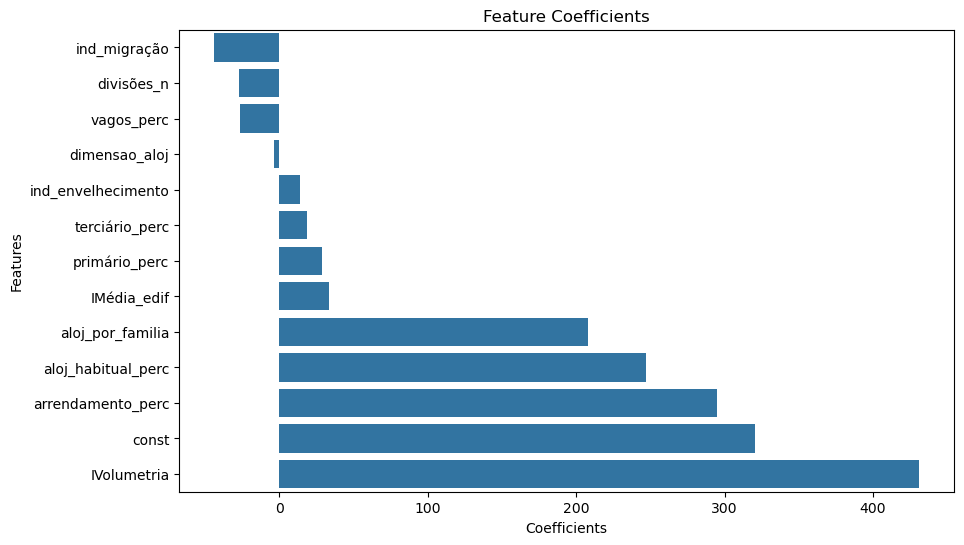

In [64]:
coefficients1 = pd.DataFrame({'Features': X1.columns, 'Coefficients': model1.params})
coefficients1 = coefficients1.sort_values(by='Coefficients')

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Features', data=coefficients1)
plt.title('Feature Coefficients')
plt.show()


**Plotting Residuals**
Plot the residuals (i.e., the difference between the observed and predicted values) to check if they are normally distributed and if there are any patterns. This can be a good diagnostic tool.

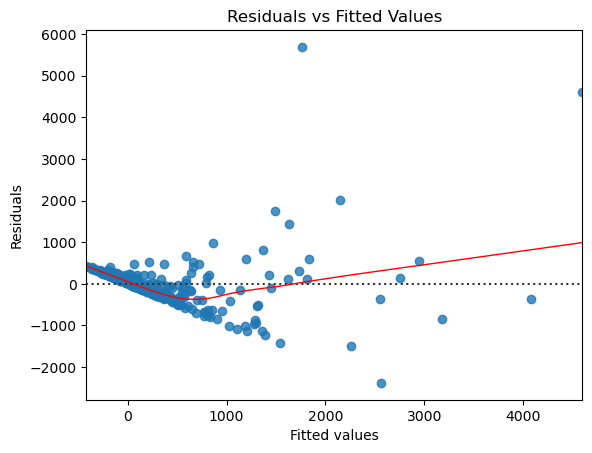

In [65]:
# Calculate residuals
residuals1 = y1 - model1.predict(X1)

# Create a seaborn residual plot
sns.residplot(x=model1.predict(X1), y=residuals1, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


**Scatter Plot of Predicted vs Actual Values**
A scatter plot of predicted vs actual values can give you an idea of how well your model is performing

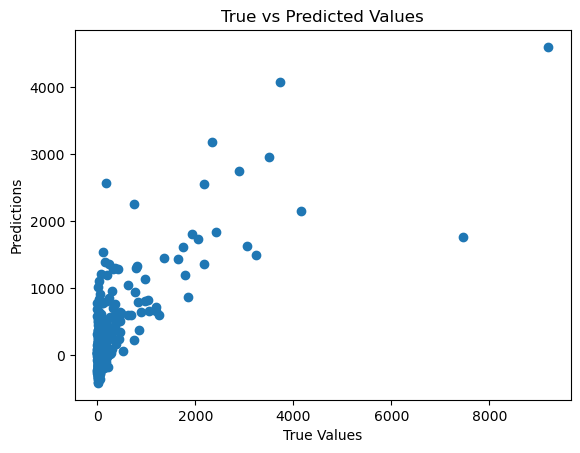

In [66]:
plt.scatter(y1, model1.predict(X1))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


**QQ Plot**
A QQ plot can help you assess if the residuals are normally distributed, which is one of the assumptions of linear regression.



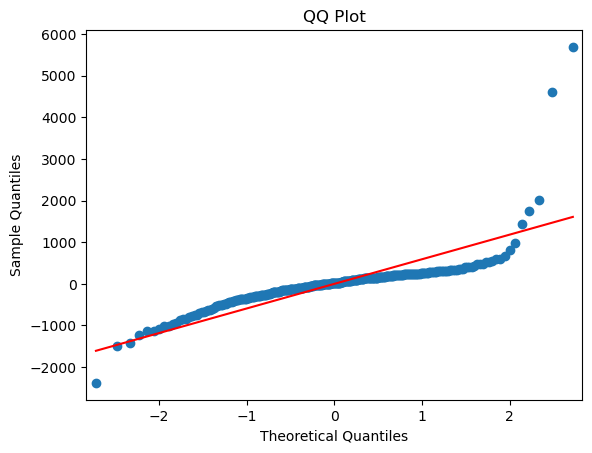

In [67]:
# QQ_Plot
sm.qqplot(residuals1, line='s')
plt.title('QQ Plot')
plt.show()


## M2: Covid = f(factors)

In [68]:
# Select independent variables
X2 = df_BGRI_M_C19[['factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5']]

# Select dependent variable
y2 = df_BGRI_M_C19['ConfirmadosAcumulado_Conc']

In [69]:
# Add a constant to the independent variable set to represent the intercept
X2 = sm.add_constant(X2)

# Fit the model
model2 = sm.OLS(y2, X2).fit()

# Print out the statistics
print(model2.summary())


                                OLS Regression Results                               
Dep. Variable:     ConfirmadosAcumulado_Conc   R-squared:                       0.504
Model:                                   OLS   Adj. R-squared:                  0.496
Method:                        Least Squares   F-statistic:                     61.14
Date:                       Tue, 31 Oct 2023   Prob (F-statistic):           7.84e-44
Time:                               14:09:48   Log-Likelihood:                -2413.2
No. Observations:                        307   AIC:                             4838.
Df Residuals:                            301   BIC:                             4861.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

**Coefficient Plot**
To visualize the coefficients, you can create a bar plot.

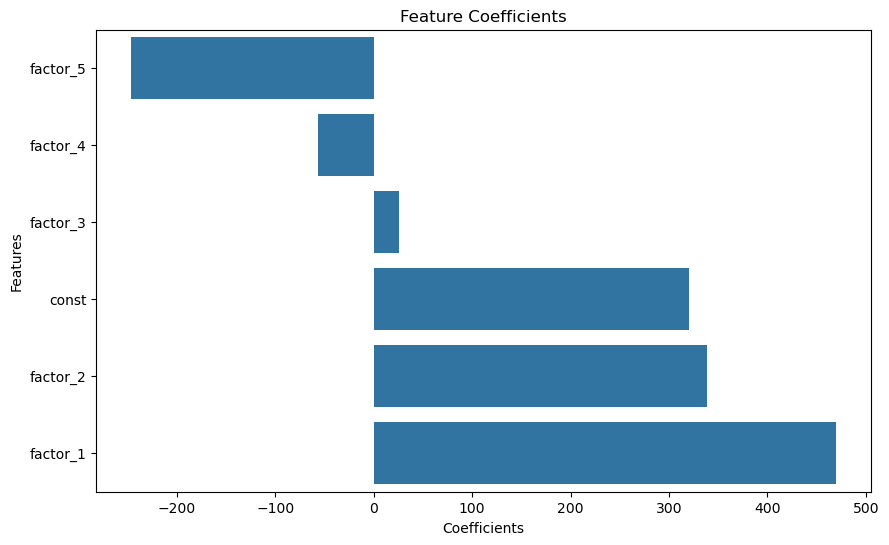

In [70]:
coefficients2 = pd.DataFrame({'Features': X2.columns, 'Coefficients': model2.params})
coefficients2 = coefficients2.sort_values(by='Coefficients')

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Features', data=coefficients2)
plt.title('Feature Coefficients')
plt.show()


**Plotting Residuals**
Plot the residuals (i.e., the difference between the observed and predicted values) to check if they are normally distributed and if there are any patterns. This can be a good diagnostic tool.

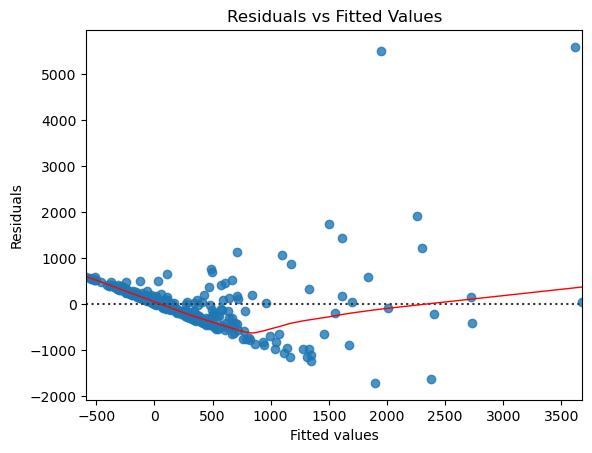

In [71]:
# Calculate residuals
residuals2 = y2 - model2.predict(X2)

# Create a seaborn residual plot
sns.residplot(x=model2.predict(X2), y=residuals2, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


**Scatter Plot of Predicted vs Actual Values**
A scatter plot of predicted vs actual values can give you an idea of how well your model is performing

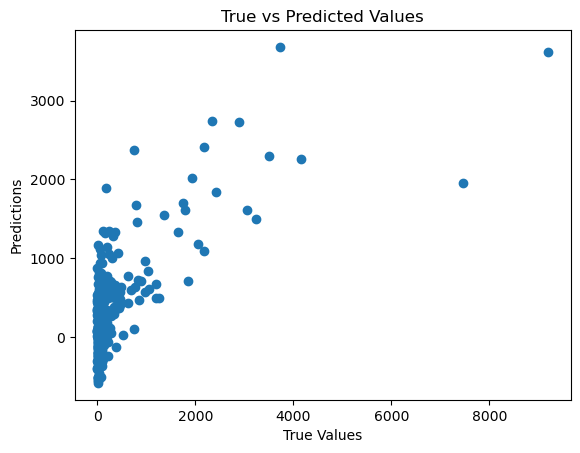

In [72]:
plt.scatter(y2, model2.predict(X2))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


**QQ Plot**
A QQ plot can help you assess if the residuals are normally distributed, which is one of the assumptions of linear regression.



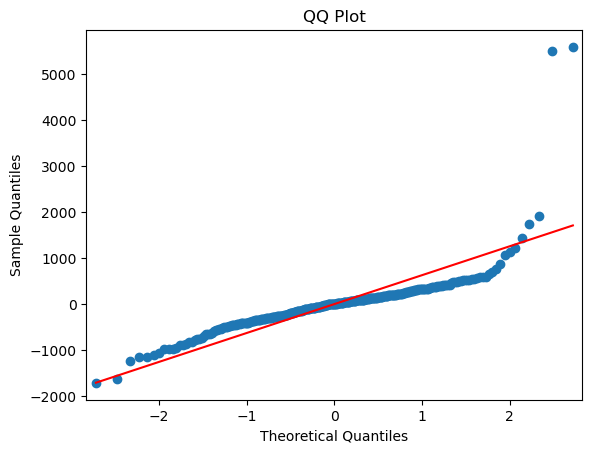

In [73]:
# QQ_Plot
sm.qqplot(residuals2, line='s')
plt.title('QQ Plot')
plt.show()


## M3: Covid/cap = f(indicators)

In [74]:
# Select independent variables
X3 = df_BGRI_M_C19[['IVolumetria', 'vagos_perc', 'IMédia_edif', 'aloj_habitual_perc', 
        'dimensao_aloj', 'aloj_por_familia', 'arrendamento_perc', 
        'divisões_n', 'ind_envelhecimento', 'ind_migração', 
        'primário_perc', 'terciário_perc']]

# Select dependent variable
y3 = df_BGRI_M_C19['confirmados por 10mil hab']

In [75]:
# Add a constant to the independent variable set to represent the intercept
X3 = sm.add_constant(X3)

# Fit the model
model3 = sm.OLS(y3, X3).fit()

# Print out the statistics
print(model3.summary())


                                OLS Regression Results                               
Dep. Variable:     confirmados por 10mil hab   R-squared:                       0.425
Model:                                   OLS   Adj. R-squared:                  0.401
Method:                        Least Squares   F-statistic:                     18.10
Date:                       Tue, 31 Oct 2023   Prob (F-statistic):           4.46e-29
Time:                               14:09:49   Log-Likelihood:                -1539.3
No. Observations:                        307   AIC:                             3105.
Df Residuals:                            294   BIC:                             3153.
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

**Coefficient Plot**
To visualize the coefficients, you can create a bar plot.

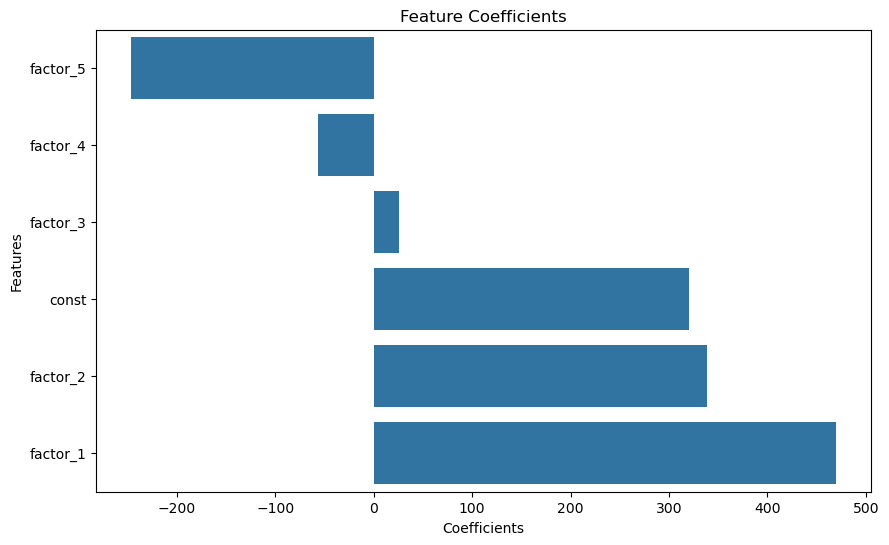

In [76]:
coefficients3 = pd.DataFrame({'Features': X3.columns, 'Coefficients': model3.params})
coefficients3 = coefficients2.sort_values(by='Coefficients')

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Features', data=coefficients3)
plt.title('Feature Coefficients')
plt.show()


**Plotting Residuals**
Plot the residuals (i.e., the difference between the observed and predicted values) to check if they are normally distributed and if there are any patterns. This can be a good diagnostic tool.

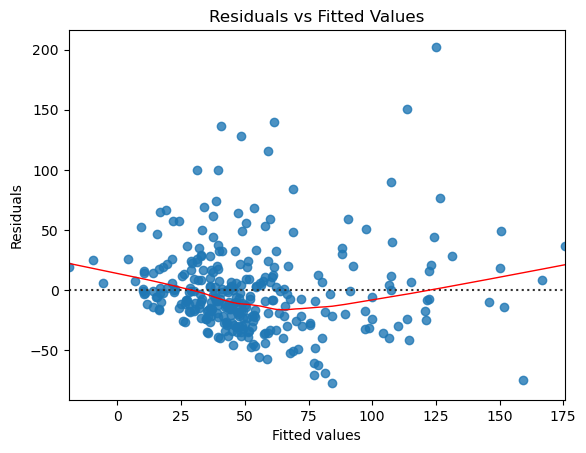

In [77]:
# Calculate residuals
residuals3 = y3 - model3.predict(X3)

# Create a seaborn residual plot
sns.residplot(x=model3.predict(X3), y=residuals3, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


**Scatter Plot of Predicted vs Actual Values**
A scatter plot of predicted vs actual values can give you an idea of how well your model is performing

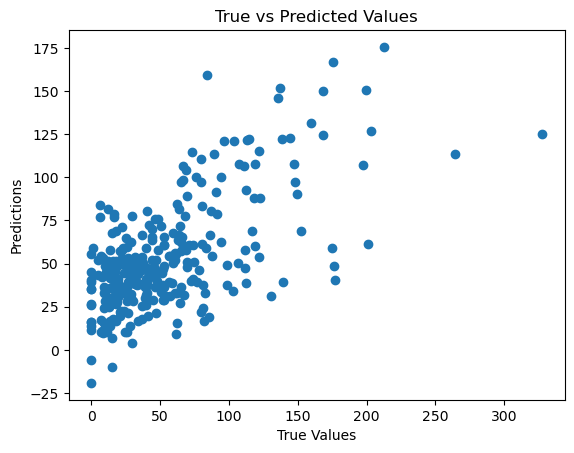

In [78]:
plt.scatter(y3, model3.predict(X3))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


**QQ Plot**
A QQ plot can help you assess if the residuals are normally distributed, which is one of the assumptions of linear regression.



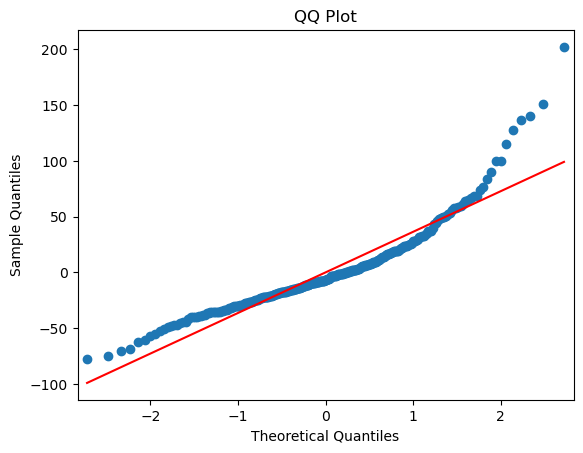

In [79]:
# QQ_Plot
sm.qqplot(residuals3, line='s')
plt.title('QQ Plot')
plt.show()


## M4: Covid/cap = f(factors)

In [80]:
# Select independent variables
X4 = df_BGRI_M_C19[['factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5']]

# Select dependent variable
y4 = df_BGRI_M_C19['confirmados por 10mil hab']

In [81]:
# Add a constant to the independent variable set to represent the intercept
X4 = sm.add_constant(X4)

# Fit the model
model4 = sm.OLS(y4, X4).fit()

# Print out the statistics
print(model4.summary())


                                OLS Regression Results                               
Dep. Variable:     confirmados por 10mil hab   R-squared:                       0.323
Model:                                   OLS   Adj. R-squared:                  0.312
Method:                        Least Squares   F-statistic:                     28.78
Date:                       Tue, 31 Oct 2023   Prob (F-statistic):           7.60e-24
Time:                               14:09:50   Log-Likelihood:                -1564.3
No. Observations:                        307   AIC:                             3141.
Df Residuals:                            301   BIC:                             3163.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

**Coefficient Plot**
To visualize the coefficients, you can create a bar plot.

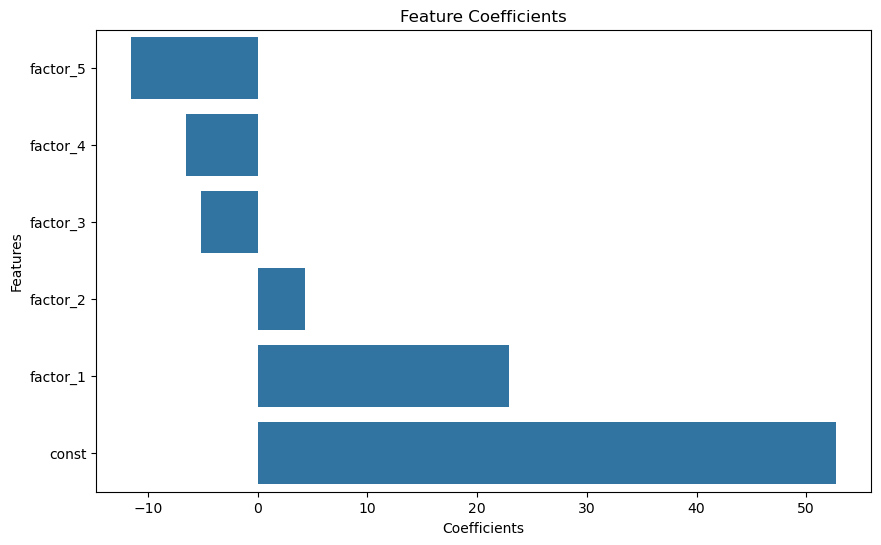

In [82]:
coefficients4 = pd.DataFrame({'Features': X4.columns, 'Coefficients': model4.params})
coefficients4 = coefficients4.sort_values(by='Coefficients')

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Features', data=coefficients4)
plt.title('Feature Coefficients')
plt.show()


**Plotting Residuals**
Plot the residuals (i.e., the difference between the observed and predicted values) to check if they are normally distributed and if there are any patterns. This can be a good diagnostic tool.

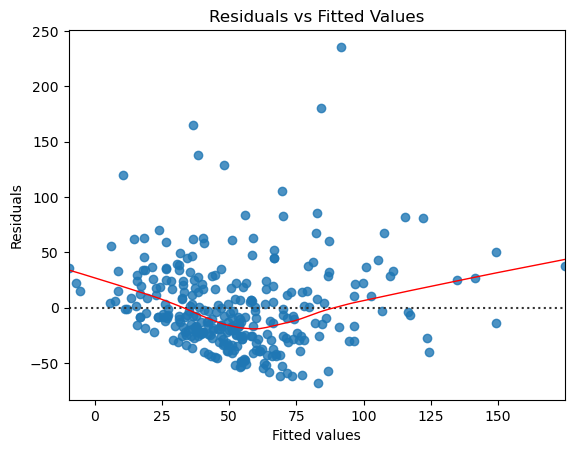

In [83]:
# Calculate residuals
residuals4 = y4 - model4.predict(X4)

# Create a seaborn residual plot
sns.residplot(x=model4.predict(X4), y=residuals4, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


**Scatter Plot of Predicted vs Actual Values**
A scatter plot of predicted vs actual values can give you an idea of how well your model is performing

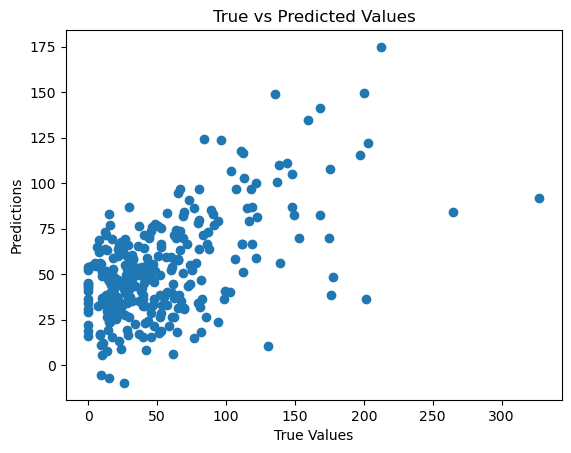

In [84]:
plt.scatter(y4, model4.predict(X4))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


**QQ Plot**
A QQ plot can help you assess if the residuals are normally distributed, which is one of the assumptions of linear regression.



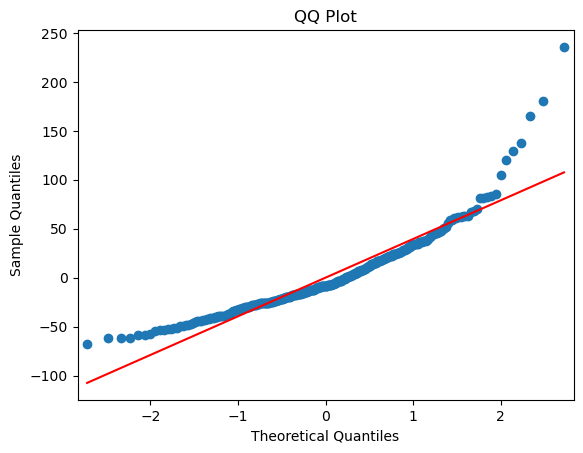

In [85]:
# QQ_Plot
sm.qqplot(residuals4, line='s')
plt.title('QQ Plot')
plt.show()
